# (b) Check normalisation of functions

In [1]:
import numpy as np
from scipy.integrate import quad
import sys
sys.path.append('DistriFuncs.py')
import DistriFuncs
import matplotlib.pyplot as plt

In [2]:
# Initial true values for the eight parameters
initial_f = 0.6
initial_mu = 3
initial_sigma = 0.3
initial_beta = 1
initial_m = 1.4
initial_Lambda = 0.3
initial_mu_b = 0
initial_sigma_b = 2.5

Check normalisations for the five density functions:

In [ ]:
# Normalization check for g_s
result_g_s, error_g_s = quad(lambda x: DistriFuncs.g_s(x, initial_mu, initial_sigma, initial_beta, initial_m), 0, 5)
print(f"Normalization of g_s(x): {result_g_s:.6f}, Error: {error_g_s:.6e}")

# Normalization check for g_b
result_g_b, error_g_b = quad(DistriFuncs.g_b, 0, 5)
print(f"Normalization of g_b(x): {result_g_b:.6f}, Error: {error_g_b:.6e}")

# Normalization check for h_s
result_h_s, error_h_s = quad(lambda y: DistriFuncs.h_s(y, initial_Lambda), 0, 10)
print(f"Normalization of h_s(y): {result_h_s:.6f}, Error: {error_h_s:.6e}")

# Normalization check for h_b
result_h_b, error_h_b = quad(lambda y: DistriFuncs.h_b(y, initial_mu_b, initial_sigma_b), 0, 10)
print(f"Normalization of h_b(y): {result_h_b:.6f}, Error: {error_h_b:.6e}")

Normalization of g_s(x): 1.000000, Error: 7.289797e-09
Normalization of g_b(x): 1.000000, Error: 1.110223e-14
Normalization of h_s(y): 1.000000, Error: 1.110223e-14
Normalization of h_b(y): 1.000000, Error: 4.839205e-12


In [ ]:
# Use Monte Carlo integration to check the normalisation of F(x,y)
def check_normalisation_for_F(f, mu, sigma, beta, m, lambda_param, mu_b, sigma_b):
    # Number of random samples
    n_samples = 1_000_000

    # Generate random samples for x and y
    x_samples = np.random.uniform(0, 5, n_samples)
    y_samples = np.random.uniform(0, 10, n_samples)

    # Evaluate F at sampled points
    f_values = DistriFuncs.F(x_samples, y_samples, f, mu, sigma, beta, m, lambda_param, mu_b, sigma_b)

    # Estimate the integral and its uncertainty
    domain_area = 5 * 10  # (x range) * (y range)
    result_F = np.mean(f_values) * domain_area
    error_F = np.std(f_values) / np.sqrt(n_samples) * domain_area

    return result_F, error_F

result_F, error_F = check_normalisation_for_F(initial_f, initial_mu, initial_sigma, initial_beta, initial_m, initial_Lambda, initial_mu_b, initial_sigma_b)
print(f"Normalization of F: {result_F:.6f}, Error: {error_F:.6e}")

Normalization of F: 1.000004 ± 1.427056e-03


In [ ]:
# Checking normalization constant with different values of parameters
f_1 = 0.5
mu_1 = 2.5
sigma_1 = 0.4
beta_1 = 0.8
m_1 = 1.5
Lambda_1 = 0.5
mu_b_1 = 0.2
sigma_b_1 = 3

# Normalization check for g_s
result_g_s_different_params, error_g_s_different_params = quad(lambda x: DistriFuncs.g_s(x, mu_1, sigma_1, beta_1, m_1), 0, 5)
print(f"Normalization of g_s(x): {result_g_s_different_params:.6f}, Error: {error_g_s_different_params:.6e}")

# Normalization check for g_b
result_g_b_different_params, error_g_b_different_params = quad(DistriFuncs.g_b, 0, 5)
print(f"Normalization of g_b(x): {result_g_b_different_params:.6f}, Error: {error_g_b_different_params:.6e}")

# Normalization check for h_s
result_h_s_different_params, error_h_s_different_params = quad(lambda y: DistriFuncs.h_s(y, Lambda_1), 0, 10)
print(f"Normalization of h_s(y): {result_h_s_different_params:.6f}, Error: {error_h_s_different_params:.6e}")

# Normalization check for h_b
result_h_b_different_params, error_h_b_different_params = quad(lambda y: DistriFuncs.h_b(y, mu_b_1, sigma_b_1), 0, 10)
print(f"Normalization of h_b(y): {result_h_b_different_params:.6f}, Error: {error_h_b_different_params:.6e}")

# Normalization check for F
result_F_different_params, error_F_different_params = check_normalisation_for_F(f_1, mu_1, sigma_1, beta_1, m_1, Lambda_1, mu_b_1, sigma_b_1)
print(f"Normalization of F: {result_F_different_params:.6f}, Error: {error_F_different_params:.6e}")

Normalization of g_s(x): 1.000000, Error: 7.364307e-09
Normalization of g_b(x): 1.000000, Error: 1.110223e-14
Normalization of h_s(y): 1.000000, Error: 1.110223e-14
Normalization of h_b(y): 1.000000, Error: 4.593584e-14
Normalization of F: 0.997946 ± 1.377607e-03


In [ ]:
# Checking normalization constant with different values of parameters
f_2 = 0.8
mu_2 = 2.8
sigma_2 = 0.5
beta_2 = 1.2
m_2 = 1.6
Lambda_2 = 0.6
mu_b_2 = 0.4
sigma_b_2 = 2.8

# Normalization check for g_s
result_g_s_different_params, error_g_s_different_params = quad(lambda x: DistriFuncs.g_s(x, mu_2, sigma_2, beta_2, m_2), 0, 5)
print(f"Normalization of g_s(x): {result_g_s_different_params:.6f}, Error: {error_g_s_different_params:.6e}")

# Normalization check for g_b
result_g_b_different_params, error_g_b_different_params = quad(DistriFuncs.g_b, 0, 5)
print(f"Normalization of g_b(x): {result_g_b_different_params:.6f}, Error: {error_g_b_different_params:.6e}")

# Normalization check for h_s
result_h_s_different_params, error_h_s_different_params = quad(lambda y: DistriFuncs.h_s(y, Lambda_2), 0, 10)
print(f"Normalization of h_s(y): {result_h_s_different_params:.6f}, Error: {error_h_s_different_params:.6e}")

# Normalization check for h_b
result_h_b_different_params, error_h_b_different_params = quad(lambda y: DistriFuncs.h_b(y, mu_b_2, sigma_b_2), 0, 10)
print(f"Normalization of h_b(y): {result_h_b_different_params:.6f}, Error: {error_h_b_different_params:.6e}")

# Normalization check for F
result_F_different_params, error_F_different_params = check_normalisation_for_F(f_2, mu_2, sigma_2, beta_2, m_2, Lambda_2, mu_b_2, sigma_b_2)
print(f"Normalization of F: {result_F_different_params:.6f}, Error: {error_F_different_params:.6e}")

Normalization of g_s(x): 1.000000, Error: 9.968543e-10
Normalization of g_b(x): 1.000000, Error: 1.110223e-14
Normalization of h_s(y): 1.000000, Error: 1.110223e-14
Normalization of h_b(y): 1.000000, Error: 2.420929e-13
Normalization of F: 0.999836 ± 2.030510e-03


# (c) One dimensional projection plot

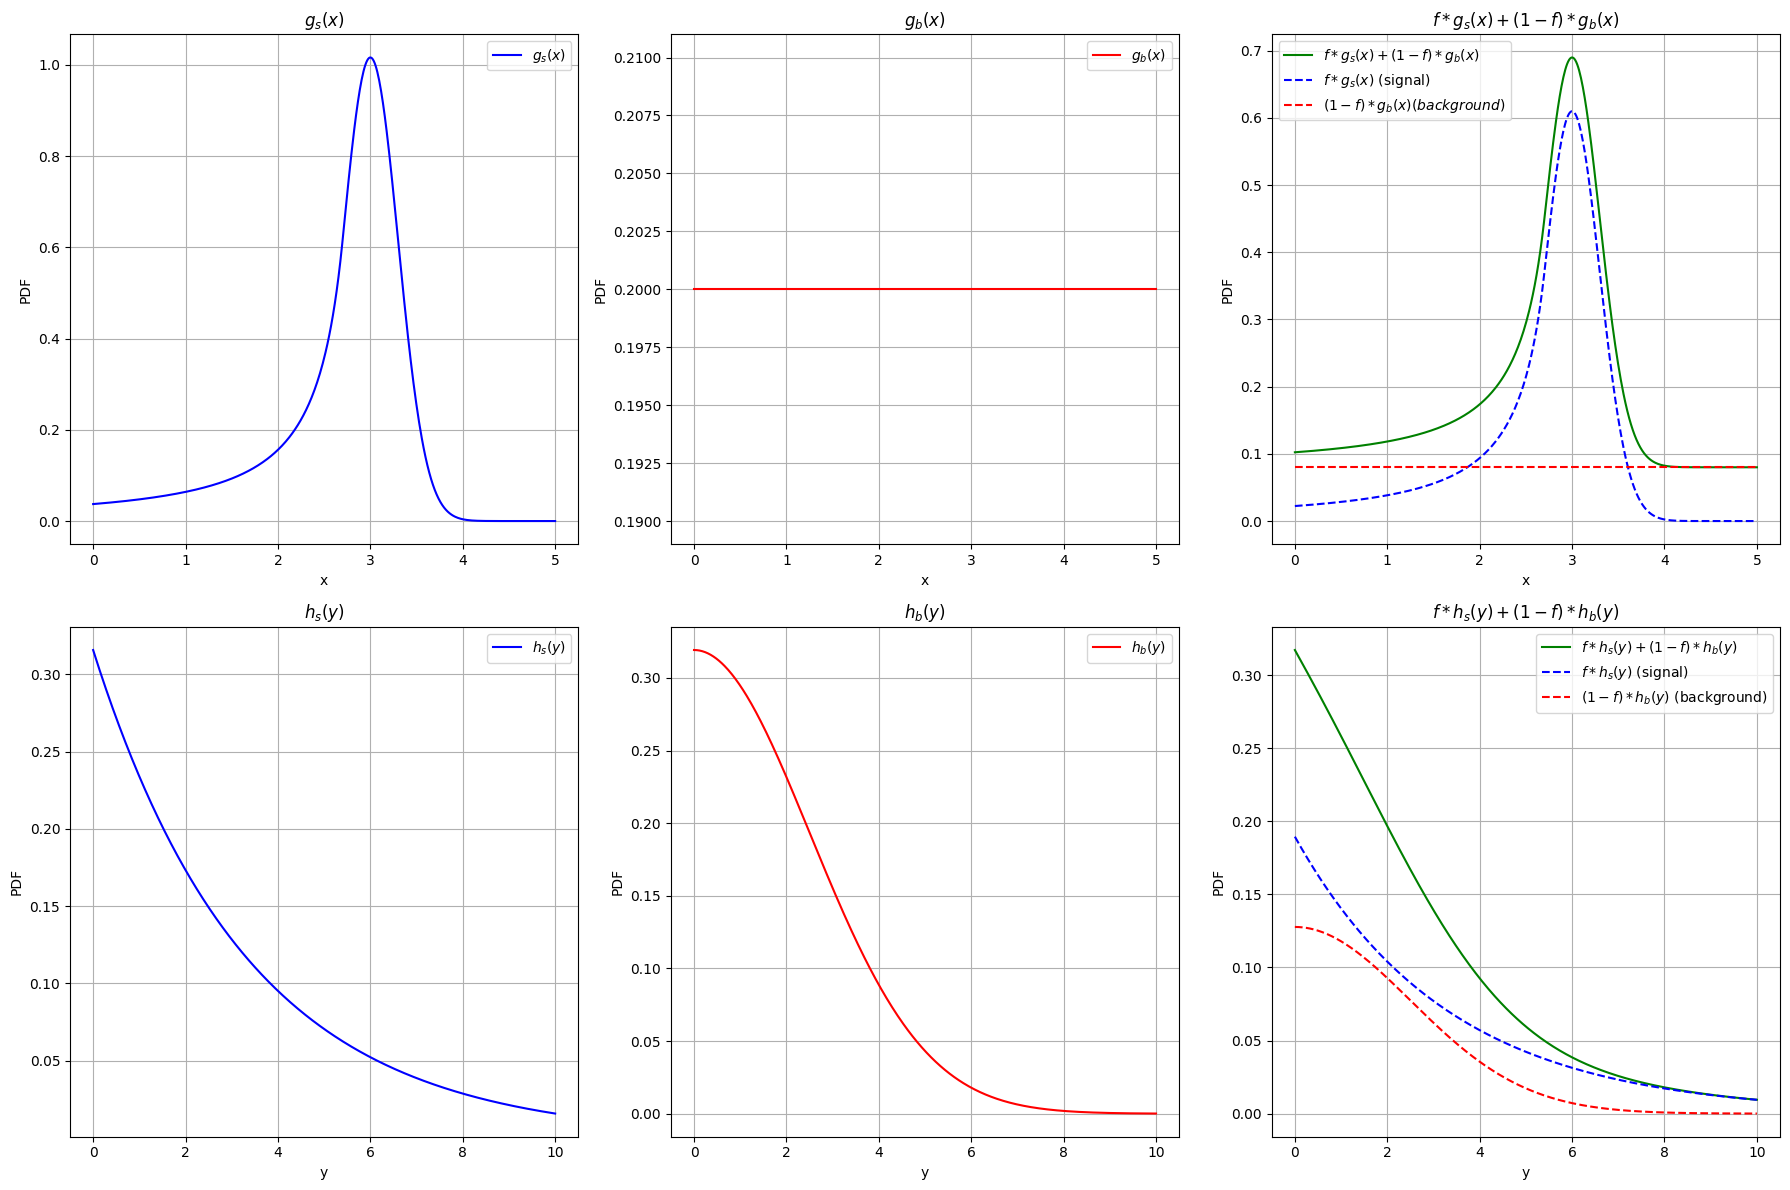

In [ ]:
def plot_one_dim_projection():
    # Define the range for x and y
    x_vals = np.linspace(0, 5, 500)
    y_vals = np.linspace(0, 10, 500)
    
    # Compute individual functions for g_s(x) and g_b(x)
    g_s_vals = DistriFuncs.g_s(x_vals, initial_mu, initial_sigma, initial_beta, initial_m)
    g_b_vals = DistriFuncs.g_b(x_vals)

    # Compute the combined distribution for g_s(x) and g_b(x)
    g_s_combined = initial_f * g_s_vals + (1 - initial_f) * g_b_vals

    # Compute individual functions for h_s(y) and h_b(y)
    h_s_vals = DistriFuncs.h_s(y_vals, initial_Lambda)
    h_b_vals = DistriFuncs.h_b(y_vals, initial_mu_b, initial_sigma_b)

    # Compute the combined distribution for h_s(y) and h_b(y)
    h_s_combined = initial_f * h_s_vals + (1 - initial_f) * h_b_vals

    # Create a figure with 2 rows and 3 columns of subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot g_s(x) and g_b(x)
    axes[0, 0].plot(x_vals, g_s_vals, label="$g_s(x)$", color="blue")
    axes[0, 0].set_title("$g_s(x)$")
    axes[0, 0].set_xlabel("x")
    axes[0, 0].set_ylabel("PDF")
    axes[0, 0].legend()
    axes[0, 0].grid(True)  # Enable grid

    axes[0, 1].plot(x_vals, g_b_vals, label="$g_b(x)$", color="red")
    axes[0, 1].set_title("$g_b(x)$")
    axes[0, 1].set_xlabel("x")
    axes[0, 1].set_ylabel("PDF")
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    axes[0, 2].plot(x_vals, g_s_combined, label="$f*g_s(x)+(1-f)*g_b(x)$", color="green")
    axes[0, 2].plot(x_vals, initial_f * g_s_vals, label="$f*g_s(x)$ (signal)", color="blue", linestyle="dashed")
    axes[0, 2].plot(x_vals, (1 - initial_f) * g_b_vals, label="$(1-f)*g_b(x) (background)$", color="red", linestyle="dashed")
    axes[0, 2].set_title("$f*g_s(x)+(1-f)*g_b(x)$")
    axes[0, 2].set_xlabel("x")
    axes[0, 2].set_ylabel("PDF")
    axes[0, 2].legend()
    axes[0, 2].grid(True)

    # Plot h_s(y) and h_b(y)
    axes[1, 0].plot(y_vals, h_s_vals, label="$h_s(y)$", color="blue")
    axes[1, 0].set_title("$h_s(y)$")
    axes[1, 0].set_xlabel("y")
    axes[1, 0].set_ylabel("PDF")
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    axes[1, 1].plot(y_vals, h_b_vals, label="$h_b(y)$", color="red")
    axes[1, 1].set_title("$h_b(y)$")
    axes[1, 1].set_xlabel("y")
    axes[1, 1].set_ylabel("PDF")
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    axes[1, 2].plot(y_vals, h_s_combined, label="$f*h_s(y)+(1-f)*h_b(y)$", color="green")
    axes[1, 2].plot(y_vals, initial_f * h_s_vals, label="$f*h_s(y)$ (signal)", color="blue", linestyle="dashed")
    axes[1, 2].plot(y_vals, (1 - initial_f) * h_b_vals, label="$(1-f)*h_b(y)$ (background)", color="red", linestyle="dashed")
    axes[1, 2].set_title("$f*h_s(y)+(1-f)*h_b(y)$")
    axes[1, 2].set_xlabel("y")
    axes[1, 2].set_ylabel("PDF")
    axes[1, 2].legend()
    axes[1, 2].grid(True)

    # Adjust layout to avoid overlapping labels
    plt.tight_layout()
    plt.show()

plot_one_dim_projection()

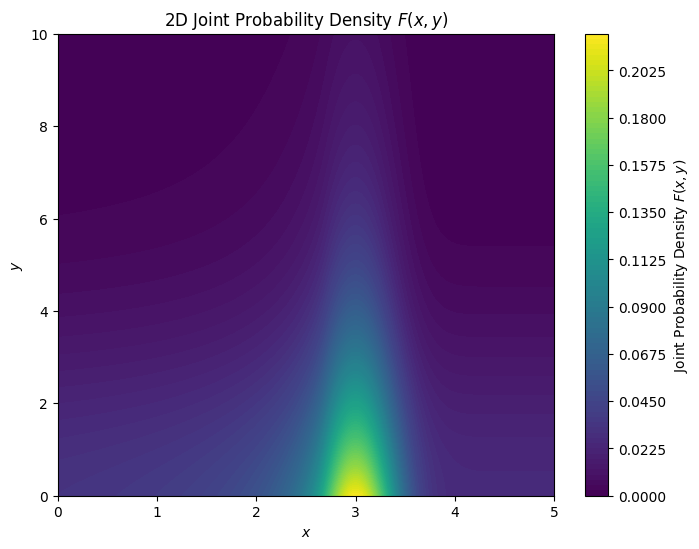

In [ ]:
def contour_plot_for_F():
    # Define the range for x and y
    x_vals = np.linspace(0, 5, 500)
    y_vals = np.linspace(0, 10, 500)

    # Create meshgrid for x and y
    X, Y = np.meshgrid(x_vals, y_vals)

    F_values = DistriFuncs.F(X, Y, initial_f, initial_mu, initial_sigma, initial_beta, initial_m, initial_Lambda, initial_mu_b, initial_sigma_b)

    # Plotting 2D joint probability density for F(x, y)
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, F_values, levels=100, cmap="viridis")
    plt.colorbar(label="Joint Probability Density $F(x, y)$")
    plt.title("2D Joint Probability Density $F(x, y)$")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.show()

contour_plot_for_F()

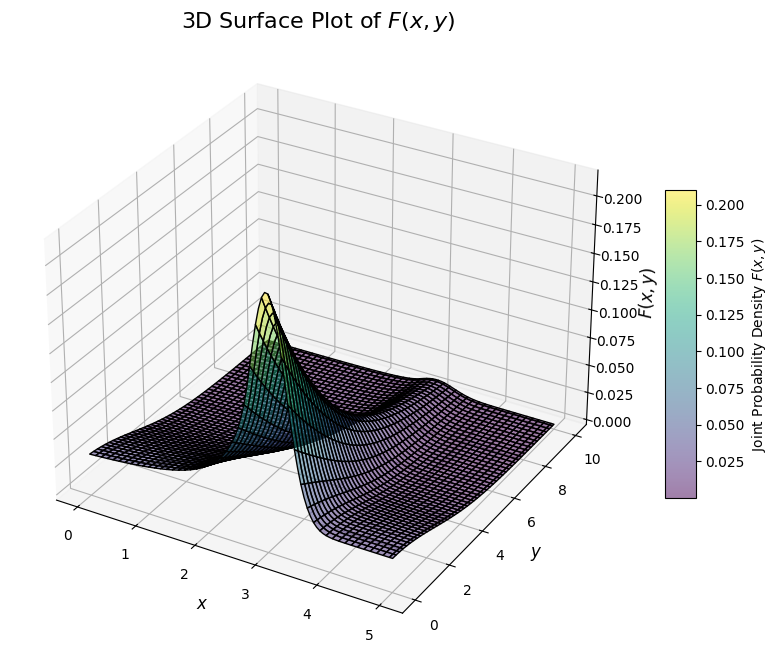

In [60]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_for_F():
    # Define the range for x and y
    x_vals = np.linspace(0, 5, 100)
    y_vals = np.linspace(0, 10, 100)

    # Create meshgrid for x and y
    X, Y = np.meshgrid(x_vals, y_vals)

    # Compute F(x, y) values
    F_values = DistriFuncs.F(X, Y, initial_f, initial_mu, initial_sigma, initial_beta, initial_m, initial_Lambda, initial_mu_b, initial_sigma_b)

    # Create a 3D figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surface = ax.plot_surface(X, Y, F_values, cmap="viridis", edgecolor='k', alpha=0.5)

    # Add a color bar
    fig.colorbar(surface, shrink=0.5, aspect=10, label="Joint Probability Density $F(x, y)$")

    # Set axis labels and title
    ax.set_title("3D Surface Plot of $F(x, y)$", fontsize=16)
    ax.set_xlabel("$x$", fontsize=12)
    ax.set_ylabel("$y$", fontsize=12)
    ax.set_zlabel("$F(x, y)$", fontsize=12)

    # Show the plot
    plt.show()

plot_3d_for_F()

# (d) Sample generation and extended maximum likelihood fit
In this task, we generate a high-statistics sample from the joint distribution $f(X,Y)$ with size 100,000 in order to reduce statistical fluctuations and allow for accurate estimations of underlying distributions or model parameters.

We will also provide an evaluation of the execution time, averaged over 100 calls for the following processes:
- Calling np.random.normal(size=100000) (this simply sets a standard benchmark for your machine)
- The call which generates your sample of 100, 000 events
- The call which performs the fit to the sample to estimate the parameters

In [61]:
from scipy.optimize import minimize
import timeit
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# Parameters
num_events = 100_000

def generate_samples(n_events, f, mu, sigma, beta, m, lambda_param, mu_b, sigma_b):
    sample_x = []
    sample_y = []
    batch_size = 1000000

    # with tqdm(total=n_events, desc="Generating Sample", unit="event", leave=True) as pbar:
    while len(sample_x) < n_events:
        # Generate random candidate points
        x = np.random.uniform(0, 5, batch_size)
        y = np.random.uniform(0, 10, batch_size)

        # Evaluate F(x, y)
        probs = DistriFuncs.F(x, y, f, mu, sigma, beta, m, lambda_param, mu_b, sigma_b)

        # Perform accept-reject step
        accepts = np.random.uniform(0, 1, batch_size) < probs
        accepted_x = x[accepts]
        accepted_y = y[accepts]

        # Collect accepted samples
        sample_x.extend(accepted_x)
        sample_y.extend(accepted_y)

        # # Update progress bar
        # pbar.update(len(accepted_x))

        # Stop once we have enough samples
        if len(sample_x) >= n_events:
            sample_x = sample_x[:n_events]
            sample_y = sample_y[:n_events]
            break

    return (np.array(sample_x), np.array(sample_y))

## Visualisation of 100,000 samples

In [5]:
# Generate 100,000 samples
x_sample, y_sample = generate_samples(num_events, 
                                      initial_f, 
                                      initial_mu, 
                                      initial_sigma, 
                                      initial_beta, 
                                      initial_m, 
                                      initial_Lambda, 
                                      initial_mu_b, 
                                      initial_sigma_b)

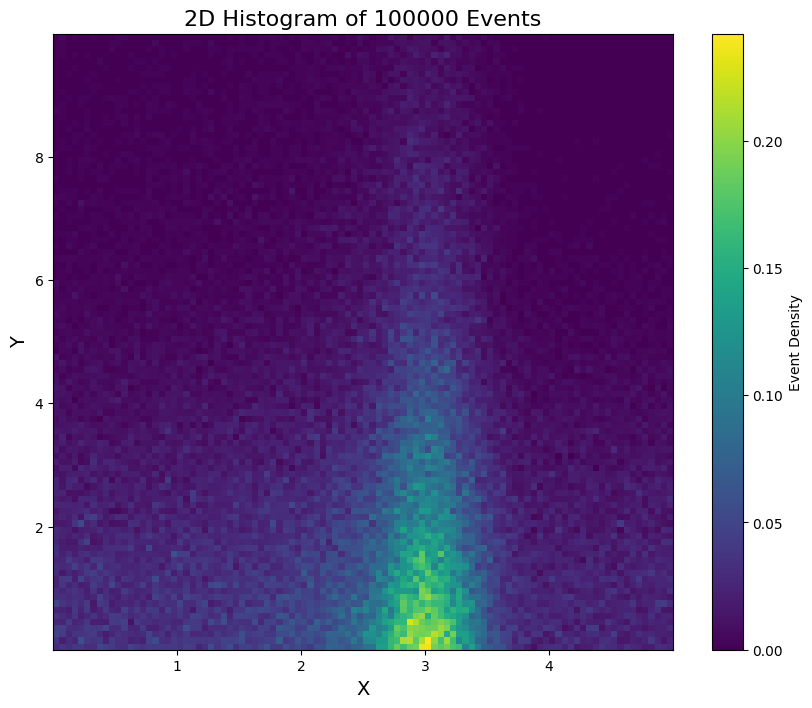

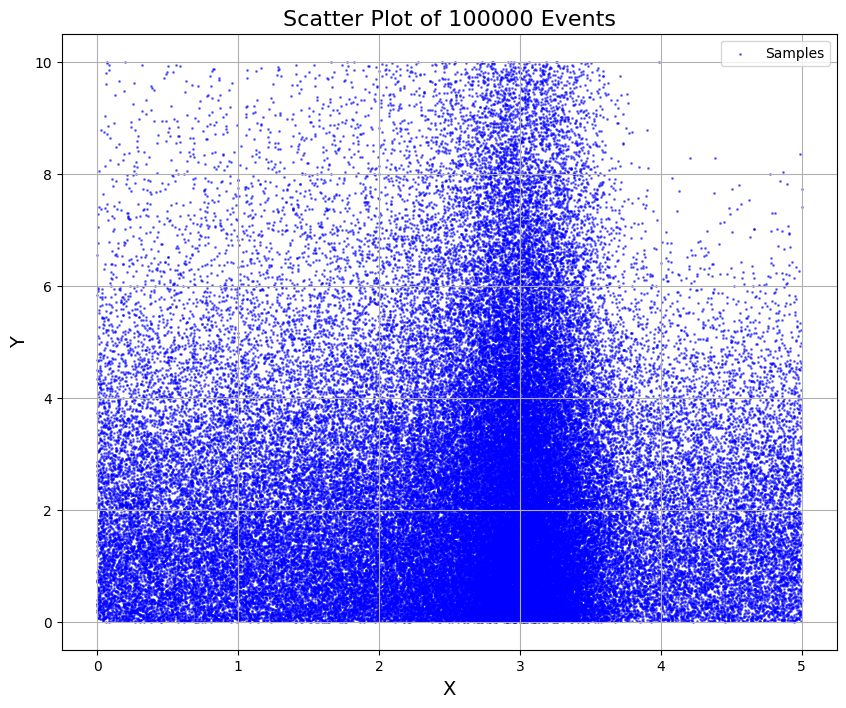

In [70]:
# 2D Histogram (Density Plot)
plt.figure(figsize=(10, 8))
plt.hist2d(x_sample, y_sample, bins=100, density=True, cmap='viridis')
plt.colorbar(label="Event Density")
plt.title(f"2D Histogram of {num_events} Events", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.grid(False)
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 8))
plt.scatter(x_sample, y_sample, s=1, alpha=0.5, label="Samples", color='blue')
plt.title(f"Scatter Plot of {num_events} Events", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

Output:
1. **2D Histogram**:
The plane is divided into bins, and the color intensity represents the number of events per bin, providing a clearer view of the density distribution.

2. **Scatter Plot**:
Each event is shown as a point on a 2D plane. The density of points reflects the joint probability distribution.

## Perform an extended maximum likelihood fit

In [6]:
from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL, ExtendedBinnedNLL

def extended_maximum_likelihood_fit(sample, N, f, mu, sigma, beta, m, lambda_param, mu_b, sigma_b):
    x_sample, y_sample = sample
    nll = ExtendedUnbinnedNLL((x_sample, y_sample), DistriFuncs.total_density)

    mi = Minuit(
        nll,
        N=N,
        f=f,
        mu=mu,
        sigma=sigma,
        beta=beta,
        m=m,
        lambda_param=lambda_param,
        mu_b=mu_b,
        sigma_b=sigma_b
    )

    mi.limits["mu"] = (0, 6) 
    mi.limits["sigma"] = (0, 1.5)
    mi.limits["beta"] = (0, 2)
    mi.limits["m"] = (1, 3)
    mi.limits["mu_b"] = (-1.5, 1.5)
    mi.limits["f"] = (0, 1)

    mi.migrad()
    mi.hesse()

    return mi

In [105]:
# import os

# if not os.path.exists('fitted_parameters.npy'):
#     print(f"Performing extended maximum likelihood fit...")
#     mi = extended_maximum_likelihood_fit(sample=(x_sample, y_sample),
#                                         N=num_events, 
#                                         f=initial_f, 
#                                         mu=initial_mu, 
#                                         sigma=initial_sigma, 
#                                         beta=initial_beta, 
#                                         m=initial_m, 
#                                         lambda_param=initial_Lambda, 
#                                         mu_b=initial_mu_b, 
#                                         sigma_b=initial_sigma_b)
#     fit_values = np.array(mi.values)
#     np.save("fitted_parameters.npy", fit_values)
#     print(f"Fitted values are correctly saved in 'fitted_parameters.npy'!")
# else:
#     # Load the fitted parameters
#     print(f"Loading fitted parameters from 'fitted_parameters.npy'...")
#     fitted_params = np.load("fitted_parameters.npy")

#     # Reconstruct the Minuit object with the loaded parameters
#     mi = Minuit(
#         fcn=ExtendedUnbinnedNLL((x_sample, y_sample), DistriFuncs.total_density),
#         N=fitted_params[0],
#         f=fitted_params[1],
#         mu=fitted_params[2],
#         sigma=fitted_params[3],
#         beta=fitted_params[4],
#         m=fitted_params[5],
#         lambda_param=fitted_params[6],
#         mu_b=fitted_params[7],
#         sigma_b=fitted_params[8]
#     )

# print(mi)

In [163]:
# Perform extended maximum likelihood fit
mi = extended_maximum_likelihood_fit(sample=(x_sample, y_sample),
                                     N=num_events, 
                                     f=initial_f, 
                                     mu=initial_mu, 
                                     sigma=initial_sigma, 
                                     beta=initial_beta, 
                                     m=initial_m, 
                                     lambda_param=initial_Lambda, 
                                     mu_b=initial_mu_b, 
                                     sigma_b=initial_sigma_b)
print(mi)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.46e+06                  │              Nfcn = 281              │
│ EDM = 0.00185 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬────────

In [107]:
mi.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.46e+06                  │             Nfcn = 1672              │
│ EDM = 0.00185 (Goal: 0.0002)     │           time = 57.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N            │ 100.00e3  │  0.32e3   │  -0.32e3   │   0.32e3   │         │         │       │
│ 1 │ f            │   0.599   │   0.004   │   -0.004   │   0.004    │    0    │    1    │       │
│ 2 │ mu           │  2.9998   │  0.0026   │  -0.0026   │   0.0026   │    0    │    6    │       │
│ 3 │ sigma        │  0.3028   │  0.0024   │  -0.0025   │   0.0025   │    0    │   1.5   │       │
│ 4 │ beta         │   1.034   │   0.023   │   -0.023   │   0.024    │    0    │    2    │       │
│ 5 │ m            │   1.30    │   0.06    │   -0.06    │    0.06    │    1    │    3    │       │
│ 6 │ lambda_param │  0.2981   │  0.0021   │  -0.0021   │   0.0021   │         │         │       │
│ 7 │ mu_b         │   -0.07   │   0.08    │   -0.09    │    0.09    │  -1.5   │   1.5   │       │
│ 8 │ sigma_b      │   2.52    │   0.04    │   -0.04    │    0.04    │         │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           N           │           f           │          mu           │         sigma         │         beta          │           m           │     lambda_param      │         mu_b          │        sigma_b        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.32e3  │  0.32e3   │  -0.004   │   0.004   │  -0.0026  │  0.0026   │  -0.0025  │  0.0025   │  -0.023   │   0.024   │   -0.06   │   0.06    │  -0.0021  │  0.0021   │   -0.09   │   0.09    │   -0.04   │   0.04    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   Fal

In [164]:
np.array(mi.values)

array([ 1.00000115e+05,  5.99290081e-01,  2.99978962e+00,  3.02769338e-01,
        1.03376001e+00,  1.30345757e+00,  2.98067052e-01, -7.48403496e-02,
        2.52004675e+00])

In [165]:
fit_values = np.array(mi.values)
np.save("fitted_parameters.npy", fit_values)

## Evaluation of the execution time

In [68]:
# Benchmark Execution Times
benchmark_time = timeit.timeit("np.random.normal(size=100_000)", globals=globals(), number=100)

# Print Results
print(f"Benchmark time (standard normal) for 100 calls: {benchmark_time:.3f} s")
print(f"Benchmark time (standard normal) averaged over 100 calls: {benchmark_time/100:.5f} s")

Benchmark time (standard normal) for 100 calls: 0.251 s
Benchmark time (standard normal) averaged over 100 calls: 0.00251 s


In [69]:
sample_time = timeit.timeit("generate_samples(num_events, initial_f, initial_mu, initial_sigma, initial_beta, initial_m, initial_Lambda, initial_mu_b, initial_sigma_b)", globals=globals(), number=100)

# Relative Execution Times
relative_sample_time = sample_time / benchmark_time

# Print results
print(f"Sample generation time for 100 calls: {sample_time:.2f} s ({relative_sample_time:.2f}x relative)")
print(f"Sample generation time averaged over 100 calls: {sample_time/100:.3f} s")

Sample generation time for 100 calls: 163.76 s (652.47x relative)
Sample generation time averaged over 100 calls: 1.638 s


In [70]:
# Define a wrapper function to encapsulate the fit call
def run_fit():
    extended_maximum_likelihood_fit(
        sample=(x_sample, y_sample),
        N=num_events,
        f=initial_f,
        mu=initial_mu,
        sigma=initial_sigma,
        beta=initial_beta,
        m=initial_m,
        lambda_param=initial_Lambda,
        mu_b=initial_mu_b,
        sigma_b=initial_sigma_b
    )

# Time 100 calls using timeit
num_repeats = 100
execution_times = []

for _ in tqdm(range(num_repeats), desc="Performing Fits", unit="fit"):
    # Use timeit for each individual call
    execution_time = timeit.timeit(run_fit, number=1)
    execution_times.append(execution_time)

# Calculate total and average times
total_fit_time = sum(execution_times)

# Relative Execution Times
relative_fit_time = total_fit_time / benchmark_time

print(f"Extended maximum likelihood fit time for 100 calls: {total_fit_time:.2f} s ({relative_fit_time:.2f}x relative)")
print(f"Extended maximum likelihood fit time averaged over 100 calls: {total_fit_time/100:.2f} s")

Performing Fits: 100%|██████████| 100/100 [18:00<00:00, 10.81s/fit]

Extended maximum likelihood fit time for 100 calls: 1080.24 s (4303.95x relative)
Extended maximum likelihood fit time averaged over 100 calls: 10.80 s


# (e) Parametric Bootstrapping

In [166]:
from scipy.stats import norm
import uncertainties as uncert
from iminuit import Minuit, cost

# set the seed for reproducibility
np.random.seed(21187)

In [167]:
# Define plot function
def plot(xvals, ax=None):
    ax = ax or plt.gca()
    
    if len(xvals) == 0:
        raise ValueError("Input `xvals` is empty.")
    if np.any(np.isnan(xvals)) or np.any(np.isinf(xvals)):
        raise ValueError("Input `xvals` contains NaN or Inf.")
    
    # Compute mean, sdev and their errors of distribution
    m = np.mean(xvals)
    s = np.std(xvals, ddof=1)
    me = s/len(xvals)**0.5 # Standard error of the mean m
    se = s/(2*len(xvals)-1)**0.5 # Standard error of the standard error s

    # Make a density histogram
    nh, xe = np.histogram( xvals, range=(m-3*s,m+3*s), bins='auto', density= True ) # nh: histogram values; xe: bin edges

    # Draw the density histogram
    ax.hist(xvals, bins=xe, density=True, alpha=0.5)

    # Also draw error bars on points
    N = np.sum(nh) / len(xvals)
    cx = 0.5 * (xe[1:] + xe[:-1])
    ax.errorbar(cx, nh, N*(nh/N)**0.5, fmt='ko')

    # Draw the normal distribution with the mean and sigma
    x = np.linspace(xe[0], xe[-1], 100)
    ax.plot(x, norm.pdf(x,m,s), 'r-')

    # Plot the results (use uncertainties package for nice formatting)
    um = uncert.ufloat(m, me)
    us = uncert.ufloat(s, se)
    mstr = f"{um:.1u}".replace("+/-", "\pm")
    sstr = f"{us:.1u}".replace("+/-","\pm")
    ax.text(0.01,0.92, f"$\hat{{\mu}} = {mstr}$", transform=ax.transAxes)
    ax.text(0.01,0.86, f"$\hat{{\sigma}} = {sstr}$", transform=ax.transAxes)

<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\h'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\h'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/2419280002.py:34: SyntaxWarning: invalid escape sequence '\p'
  mstr = f"{um:.1u}".replace("+/-", "\pm")
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/2419280002.py:35: SyntaxWarning: invalid escape sequence '\p'
  sstr = f"{us:.1u}".replace("+/-","\pm")
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ip

In [168]:
loaded_fit_values = np.load("fitted_parameters.npy")
print(loaded_fit_values[0])

100000.11476527956


In [169]:
# Define function to generate 250 toys
def generate_250_toys(N_trial):
    # Loading the file with mi.values
    loaded_fit_values = np.load("fitted_parameters.npy")
    fitted_f = loaded_fit_values[1]
    fitted_mu = loaded_fit_values[2]
    fitted_sigma = loaded_fit_values[3]
    fitted_beta = loaded_fit_values[4]
    fitted_m = loaded_fit_values[5]
    fitted_Lambda = loaded_fit_values[6]
    fitted_mu_b = loaded_fit_values[7]
    fitted_sigma_b = loaded_fit_values[8]

    # Generate 250 toys
    N_toy = 250
    toys = [generate_samples(np.random.poisson(N_trial), fitted_f, fitted_mu, fitted_sigma, fitted_beta, fitted_m, fitted_Lambda, fitted_mu_b, fitted_sigma_b) for _ in range(N_toy)]

    return toys

In [ ]:
def show_final_plots(N_trial):

    toys = generate_250_toys(N_trial)

    # Now fit each toy and store the values and errors
    values = []
    errors = []
    for toy in tqdm(toys):
        mi_t = extended_maximum_likelihood_fit(toy, N_trial, initial_f, initial_mu, initial_sigma, initial_beta, initial_m, initial_Lambda, initial_mu_b, initial_sigma_b)
        values.append(list(mi_t.values))
        errors.append(list(mi_t.errors))
    
    values = np.array(values)
    truth = np.array(list(mi.values)) 
    errors = np.array(errors)
    pulls = (values - truth)/errors
    # print(pulls[:,7])

    # Plot them
    fig, axes = plt.subplots(9,2, figsize=(20,55))
    names = ['N', 'f', r'\mu', r'\sigma', r'\beta', 'm', r'\lambda', r'\mu_b', r'\sigma_b']
    for i, name in enumerate(names):

        estname = f"\hat{{{name.split('_')[0]}}}"
        if len(name.split('_'))>1: estname += '_'+name.split('_')[1]

        ax = axes[i,0]
        plot( values[:,i], ax ) 
        ax.set_xlabel( f"${estname}$" )
        ax.set_title(f"Distribution of ${estname}$")

        ax = axes[i,1]
        plot( pulls[:,i], ax ) 
        ax.set_xlabel( f"$p({estname})$" )
        ax.set_title(f"Distribution of pulls of ${estname}$")  
    
    plt.show()

    return values[:,6], pulls[:,6]

<>:40: SyntaxWarning: invalid escape sequence '\h'
<>:40: SyntaxWarning: invalid escape sequence '\h'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/681758560.py:40: SyntaxWarning: invalid escape sequence '\h'
  estname = f"\hat{{{name.split('_')[0]}}}"


### Plots for parametric bootstrapping with various sample sizes

100%|██████████| 250/250 [03:02<00:00,  1.37it/s]


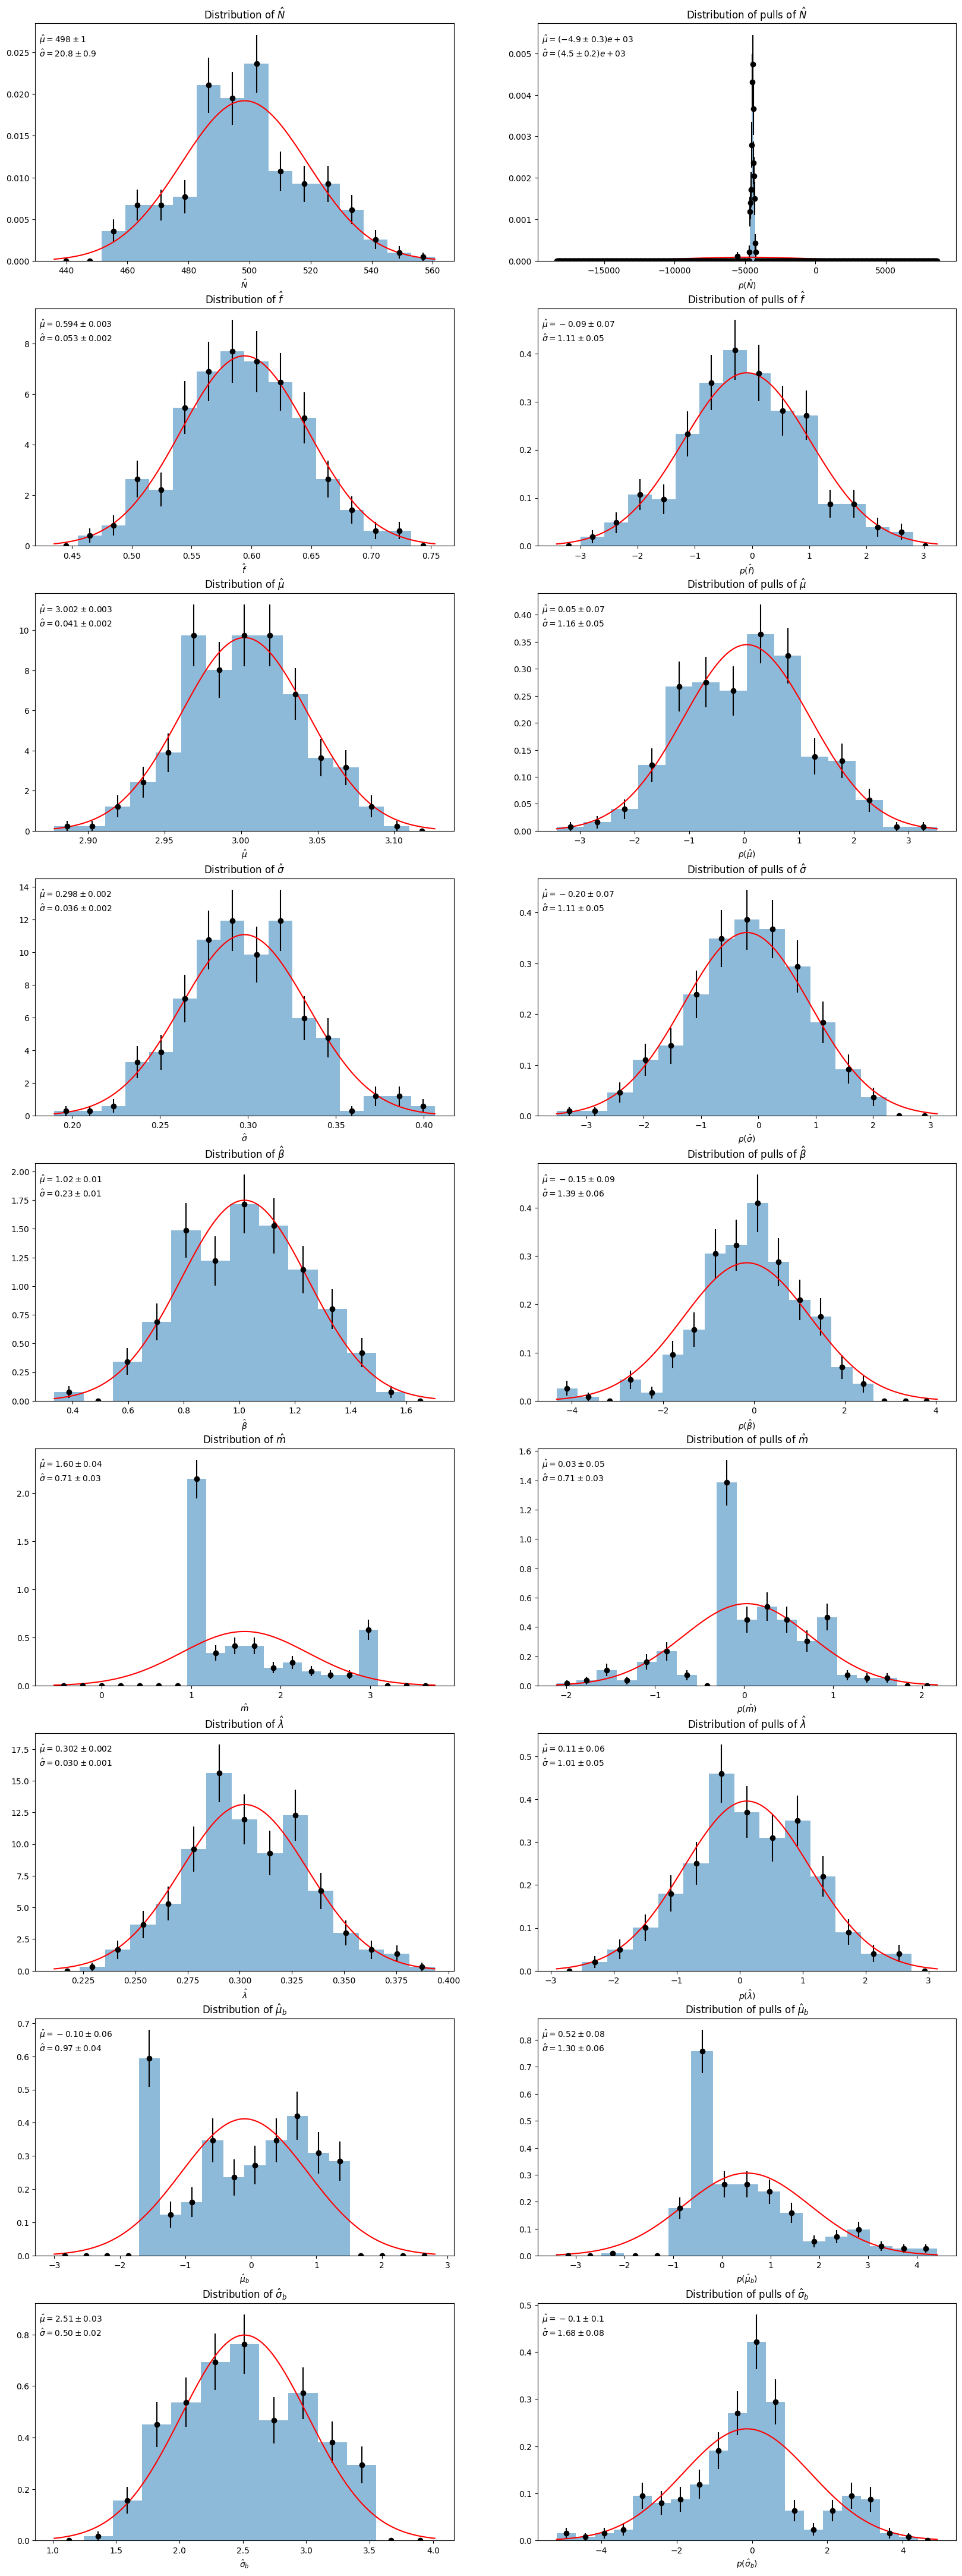

The values of estimated lambda are: [0.28608111 0.32614136 0.33939366 0.27698472 0.32535327 0.31824862
 0.27382632 0.2789075  0.3446539  0.28611863 0.32664969 0.25201776
 0.29513605 0.25942414 0.29141957 0.29428831 0.2991613  0.37550076
 0.25908474 0.30729708 0.29753056 0.32221719 0.29371526 0.30894727
 0.29640989 0.29813727 0.24441859 0.30248331 0.28379917 0.28502942
 0.33327176 0.29763551 0.27815511 0.29490262 0.29889563 0.28695243
 0.30974713 0.30731087 0.33366562 0.33614927 0.31239626 0.29616332
 0.2692163  0.3176981  0.34275717 0.31896449 0.28362093 0.25416363
 0.29206937 0.31379401 0.26533602 0.30321114 0.3013224  0.32127881
 0.33911788 0.2985606  0.30793618 0.38529276 0.26724376 0.30692736
 0.33067387 0.34722599 0.24864397 0.22853491 0.26582632 0.37382463
 0.3376729  0.32844594 0.32831258 0.26711517 0.24613607 0.34252879
 0.28813569 0.328424   0.26386243 0.31133285 0.28156803 0.28684606
 0.28799412 0.36423791 0.32554829 0.32166767 0.33843706 0.35610038
 0.33046249 0.27380081 0.3

In [176]:
lambda_part_e_500, pulls_part_e_500 = show_final_plots(500)
print(f"The values of estimated lambda are: {lambda_part_e_500}")
print(f"The values of pulls are: {pulls_part_e_500}")

100%|██████████| 250/250 [03:16<00:00,  1.27it/s]


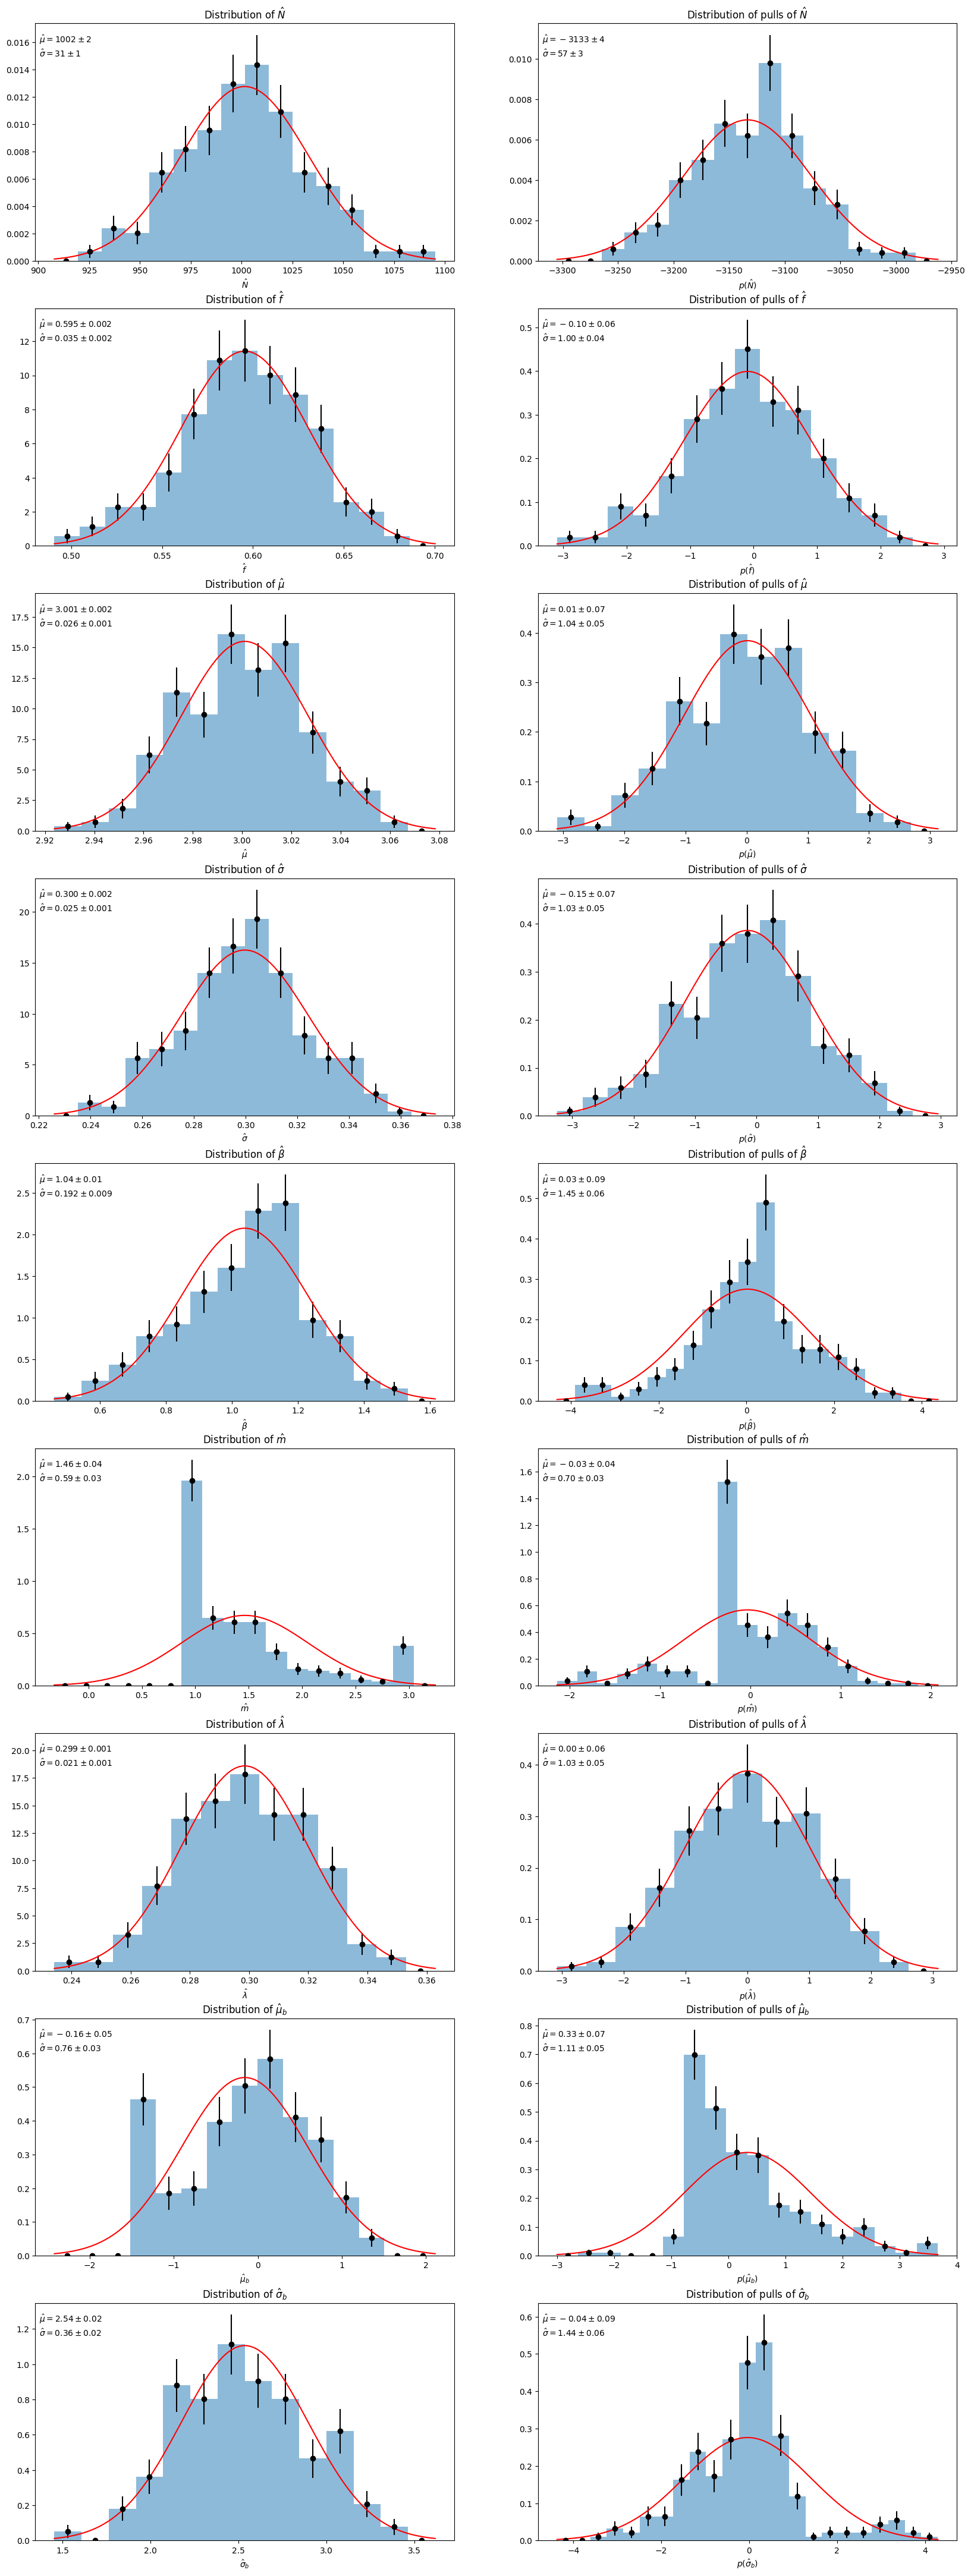

The values of estimated lambda are: [0.30502738 0.30453362 0.34945302 0.26885416 0.29092767 0.28624961
 0.29646529 0.27113546 0.30808029 0.30362828 0.32439002 0.31796034
 0.32409482 0.2883524  0.29371685 0.31213961 0.29886234 0.32389189
 0.26394059 0.28757717 0.31816225 0.28474893 0.27021532 0.30034048
 0.32487549 0.27591472 0.26507093 0.28070366 0.29673266 0.32545525
 0.27921181 0.3398476  0.29717004 0.29721783 0.29963485 0.30952059
 0.28987679 0.31918614 0.27564957 0.27408591 0.34093907 0.31552134
 0.29281506 0.30593519 0.27422438 0.24176317 0.29038909 0.30530342
 0.31082644 0.29048038 0.28196745 0.30658327 0.31555872 0.27424181
 0.29942552 0.29211106 0.27546338 0.31189714 0.30816923 0.27363919
 0.28162684 0.31548036 0.26578373 0.3189647  0.2818063  0.29524293
 0.2912136  0.27627742 0.28198462 0.27262639 0.29819165 0.31595681
 0.30494894 0.33394349 0.31839301 0.27386541 0.31753874 0.33281938
 0.33177448 0.34550425 0.28263176 0.31547119 0.27776476 0.3065836
 0.30825682 0.31929585 0.30

In [180]:
lambda_part_e_1000, pulls_part_e_1000 = show_final_plots(1000)
print(f"The values of estimated lambda are: {lambda_part_e_1000}")
print(f"The values of pulls are: {pulls_part_e_1000}")

100%|██████████| 250/250 [04:00<00:00,  1.04it/s]


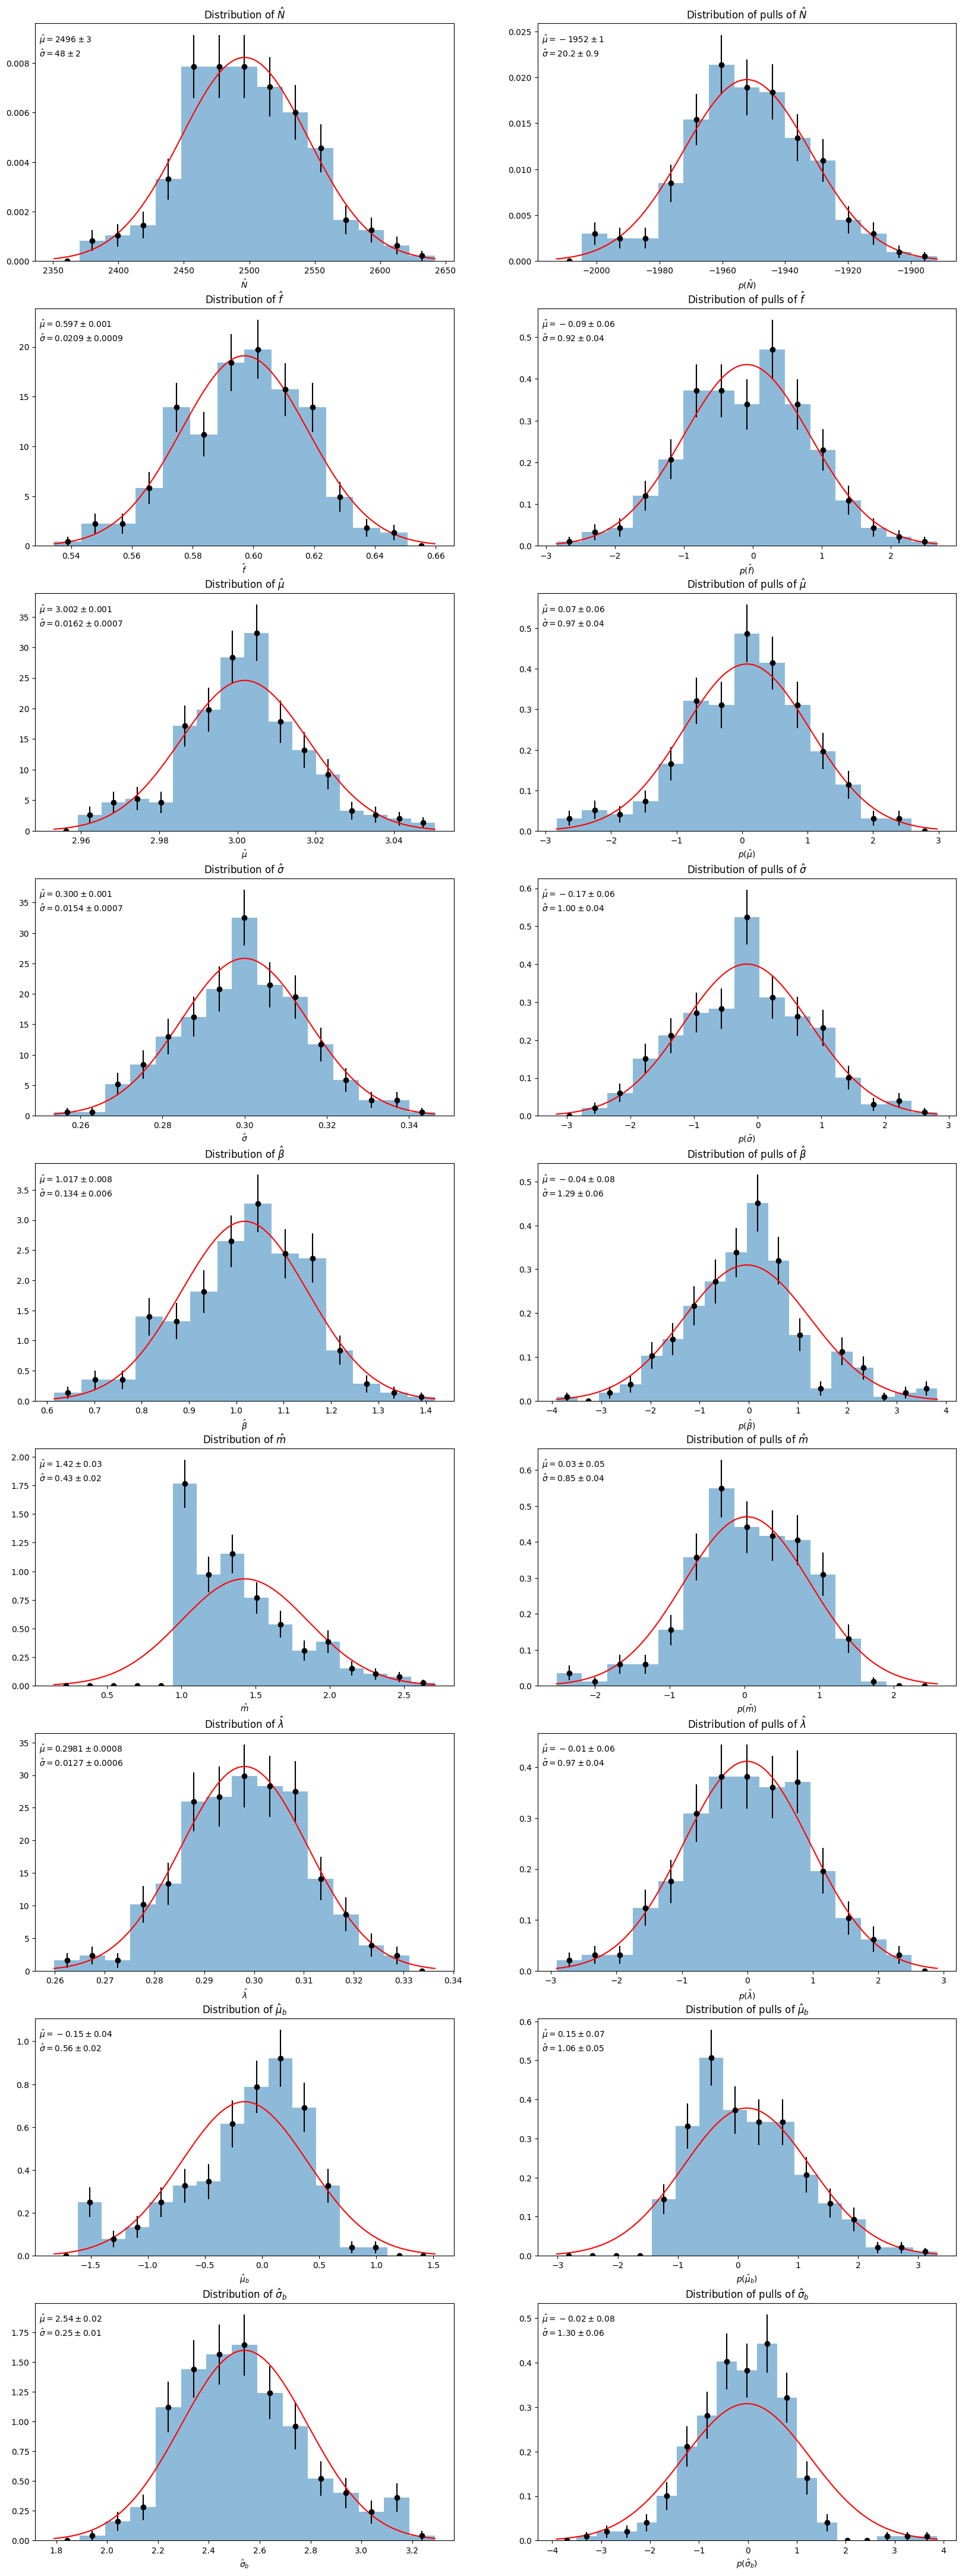

The values of estimated lambda are: [0.32693855 0.28560749 0.2861927  0.28745382 0.29623559 0.28124132
 0.28912023 0.27930768 0.28072776 0.31232891 0.30234187 0.30690536
 0.30266113 0.29918358 0.29719393 0.29977443 0.29202211 0.28942802
 0.30950117 0.29090753 0.30554244 0.30808252 0.30704719 0.29210902
 0.29842791 0.30902014 0.29588797 0.3069631  0.30979829 0.30495701
 0.29350374 0.30246856 0.31739378 0.29363953 0.29925755 0.30548753
 0.28511263 0.29908051 0.31304625 0.29173991 0.30428345 0.30325268
 0.29103398 0.28634515 0.31053381 0.28519361 0.29716016 0.31024018
 0.30666441 0.30934372 0.28459257 0.30754946 0.30226282 0.28650329
 0.2952     0.29193026 0.27929131 0.26683551 0.30645356 0.29717408
 0.27797506 0.30682601 0.32316577 0.28782624 0.30716342 0.29177441
 0.28445063 0.31986938 0.30085092 0.32085541 0.29738982 0.30093238
 0.3003838  0.28806008 0.31458317 0.29954803 0.28950914 0.30220007
 0.29101047 0.29980301 0.27579154 0.31525835 0.31181104 0.27841624
 0.2836339  0.29043988 0.2

In [184]:
lambda_part_e_2500, pulls_part_e_2500 = show_final_plots(2500)
print(f"The values of estimated lambda are: {lambda_part_e_2500}")
print(f"The values of pulls are: {pulls_part_e_2500}")

100%|██████████| 250/250 [04:39<00:00,  1.12s/it]


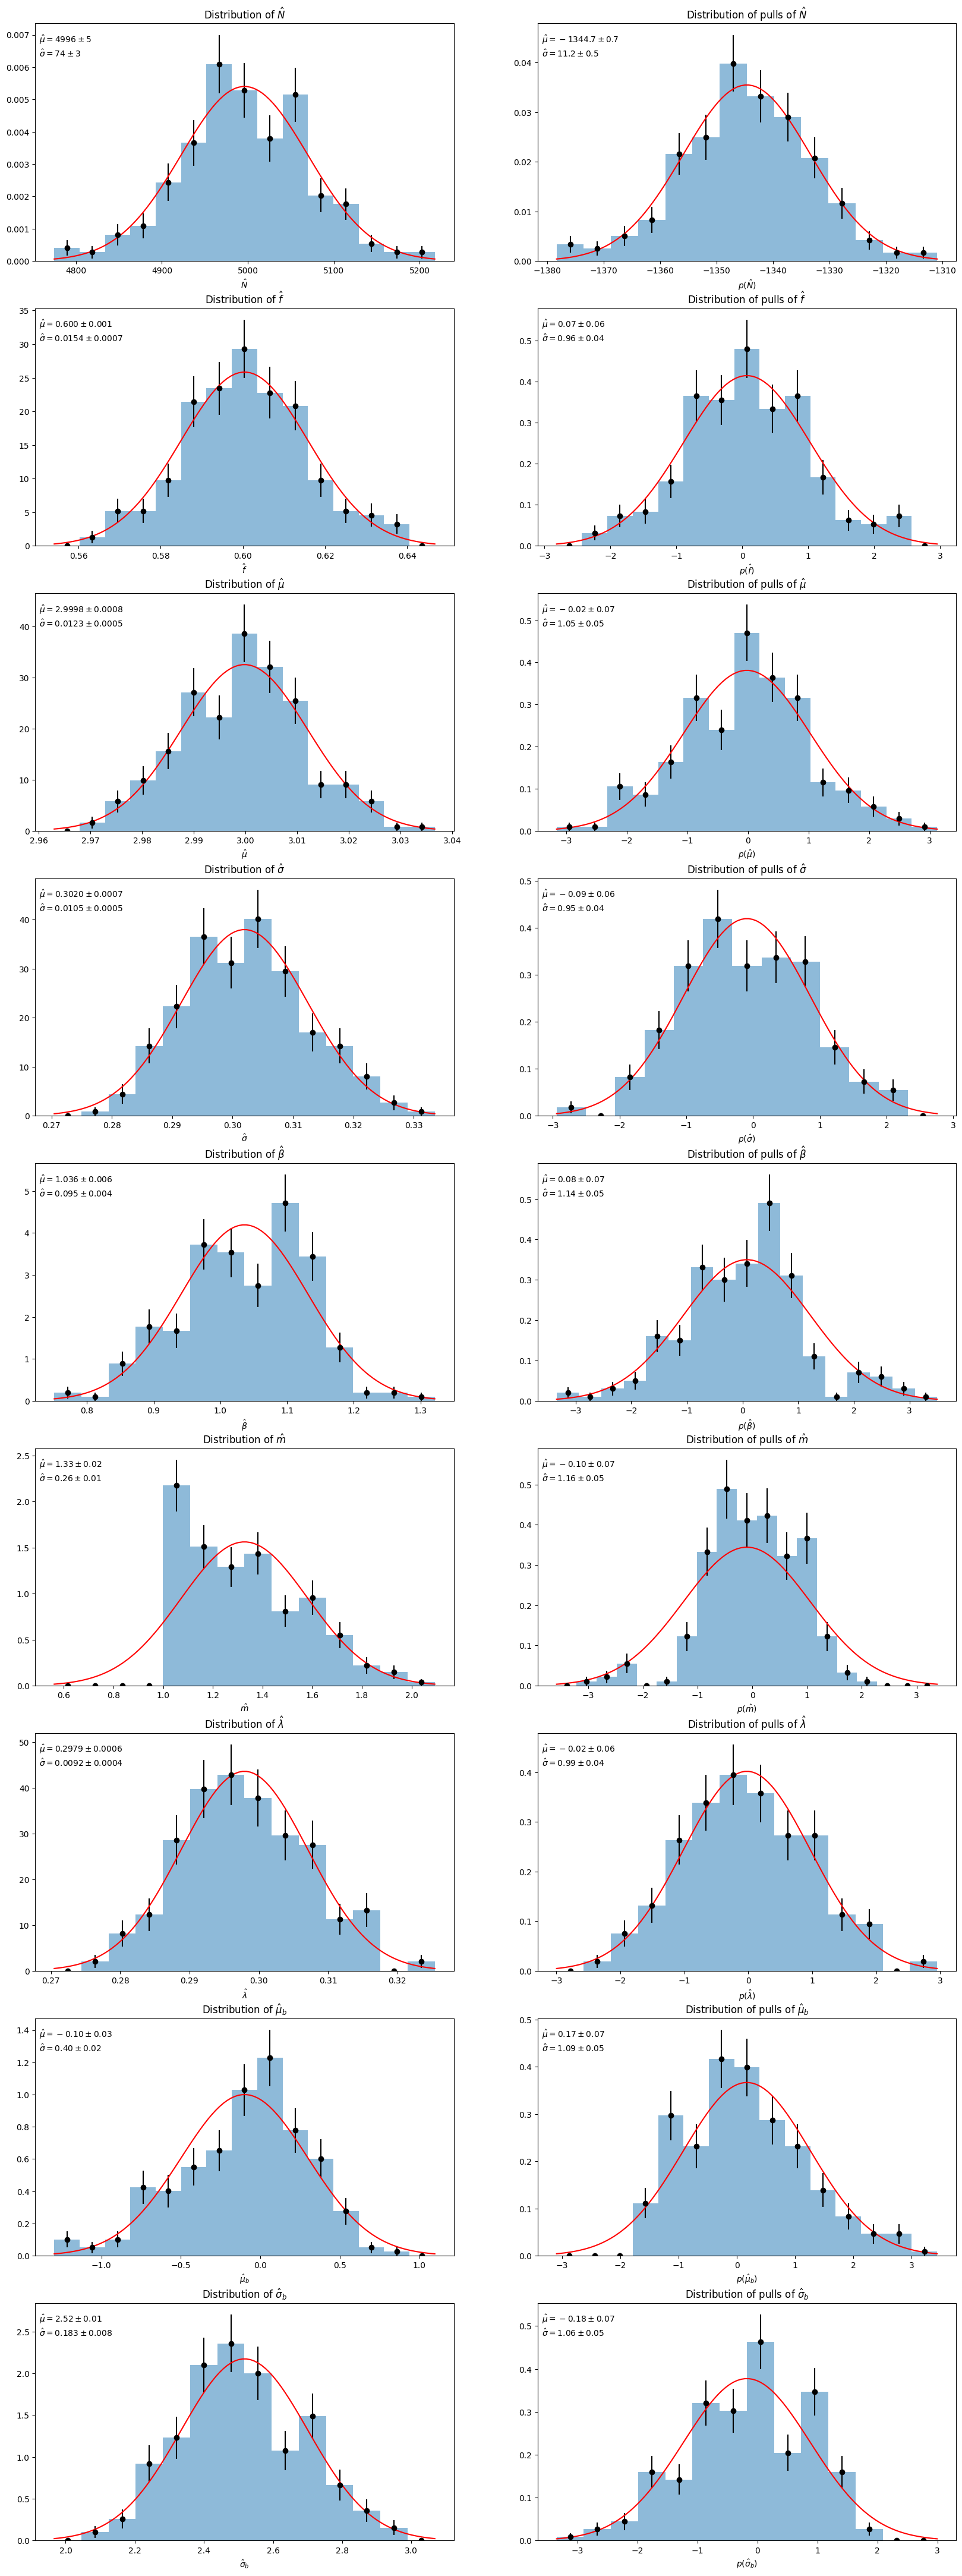

The values of estimated lambda are: [0.29930568 0.29600919 0.30076626 0.30010266 0.29714557 0.30390583
 0.28860424 0.31373089 0.2871859  0.29445029 0.30704212 0.30476983
 0.31375936 0.28650232 0.28668968 0.29874569 0.28101653 0.29148487
 0.31401371 0.30880483 0.2972282  0.29765039 0.2998372  0.31154763
 0.30664229 0.29954568 0.30720168 0.30496629 0.29029224 0.28823714
 0.27488459 0.28278112 0.28723936 0.2803693  0.29545781 0.29205495
 0.28376801 0.31270162 0.28487014 0.2989465  0.29013541 0.30760946
 0.29773861 0.30444006 0.30459715 0.29528336 0.29027667 0.28355153
 0.30582293 0.29794004 0.29630038 0.29747255 0.30351168 0.29190249
 0.29211014 0.29202665 0.29727453 0.28610667 0.30158582 0.2977899
 0.31609707 0.29821717 0.30778546 0.29241339 0.29758435 0.29610524
 0.30477501 0.28541713 0.28816362 0.30865642 0.30072913 0.3002116
 0.29101711 0.30780637 0.30030329 0.28661243 0.29695133 0.29186023
 0.29355376 0.29616029 0.29156641 0.31158427 0.28691786 0.28915799
 0.28831673 0.31682735 0.314

In [185]:
lambda_part_e_5000, pulls_part_e_5000 = show_final_plots(5000)
print(f"The values of estimated lambda are: {lambda_part_e_5000}")
print(f"The values of pulls are: {pulls_part_e_5000}")

100%|██████████| 250/250 [06:54<00:00,  1.66s/it]


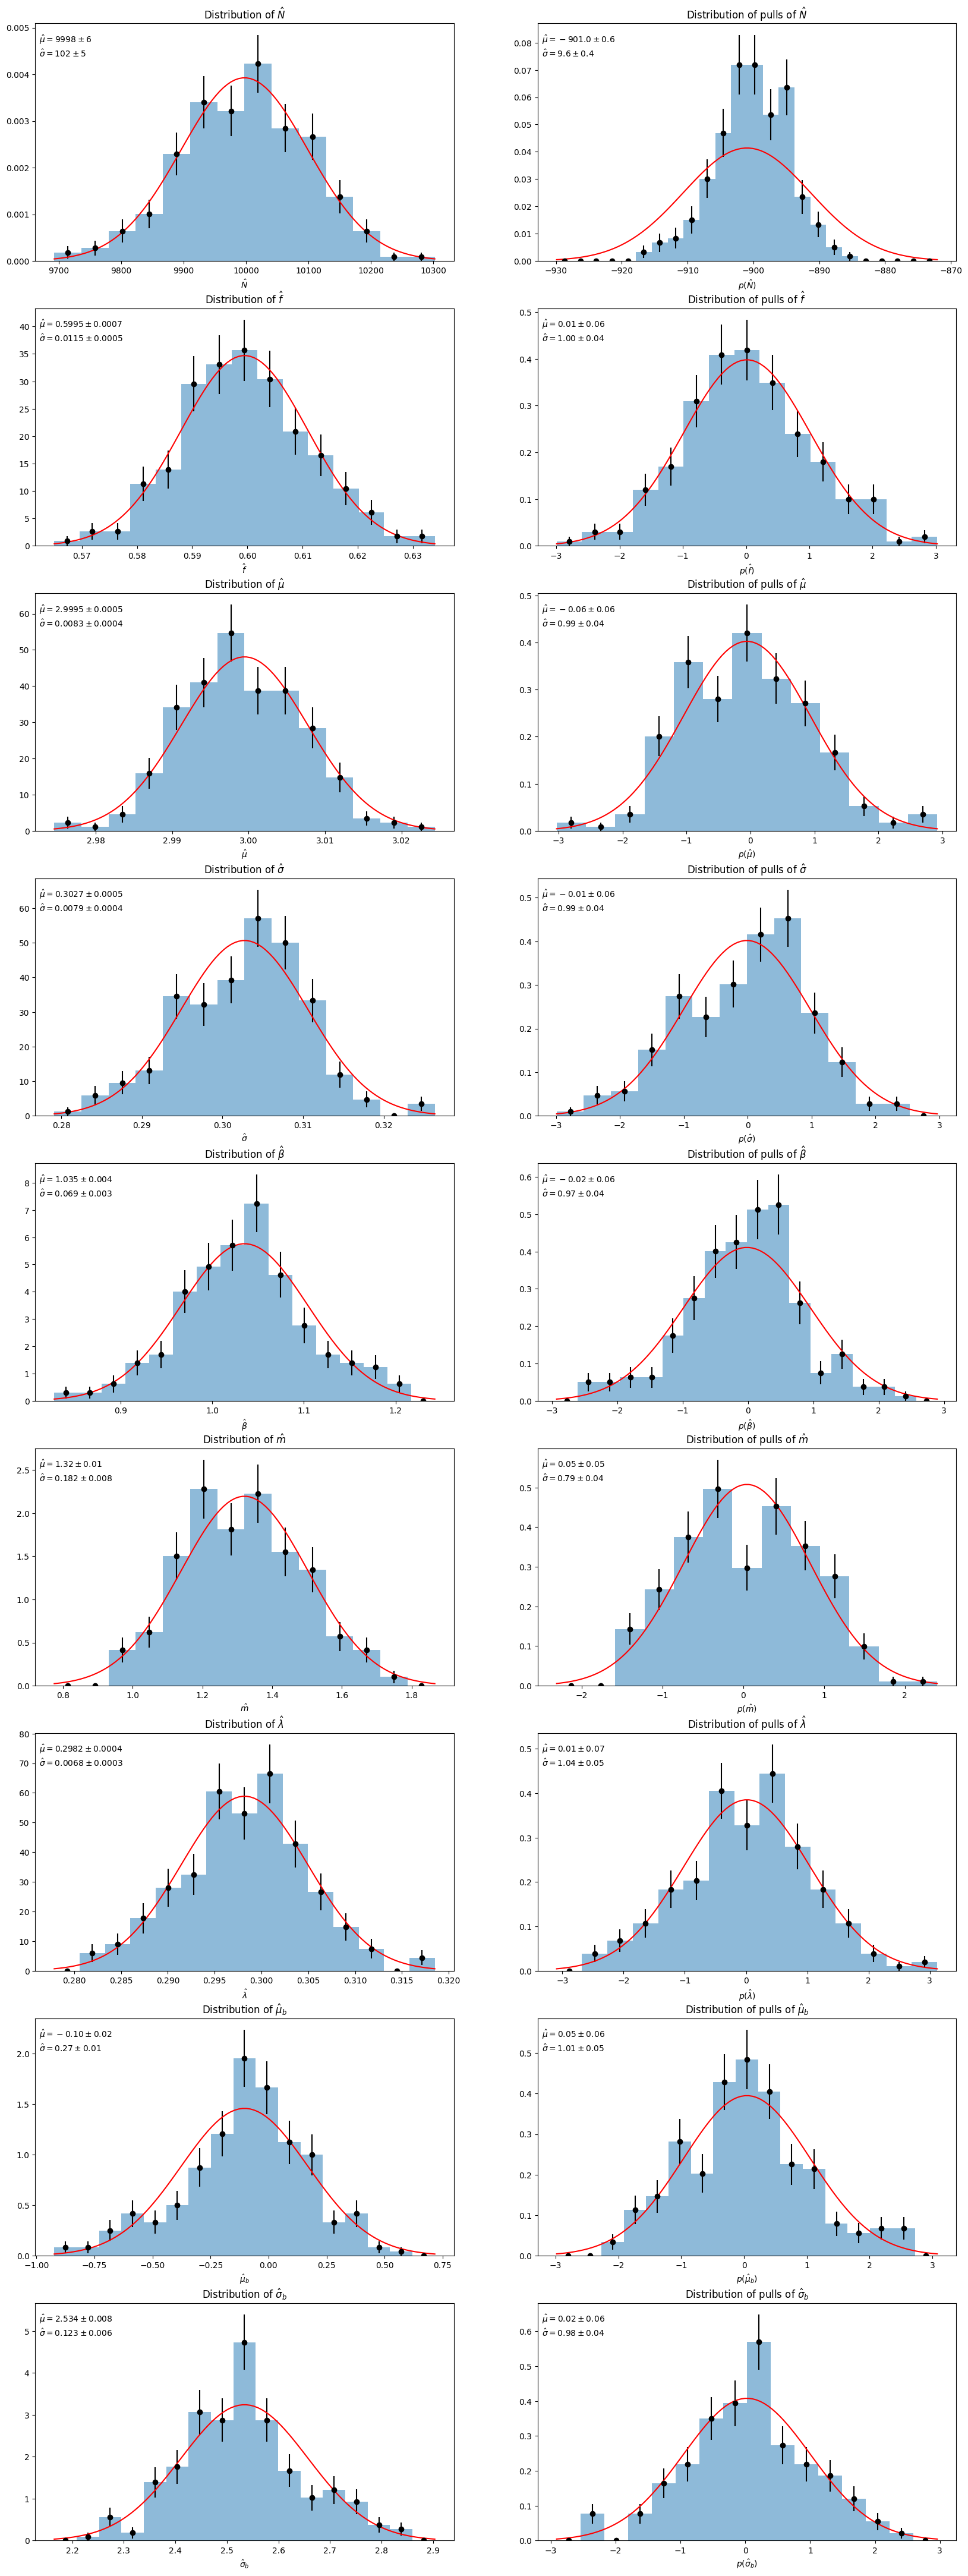

The values of estimated lambda are: [0.29810036 0.29214425 0.31690885 0.30284476 0.30365902 0.29635936
 0.29954366 0.29505602 0.29044918 0.29580601 0.30707832 0.30805628
 0.30305534 0.29588543 0.28114735 0.29290346 0.29743721 0.30349421
 0.30199125 0.300275   0.29051586 0.30244641 0.2959321  0.30312344
 0.29130907 0.30377716 0.28515166 0.30382655 0.30760742 0.29449733
 0.30369011 0.2946157  0.29921225 0.30826185 0.30139212 0.30110728
 0.28406015 0.2948518  0.30816291 0.29602161 0.29876761 0.29487754
 0.29746401 0.30151339 0.28976892 0.29596515 0.29774771 0.29023295
 0.30012702 0.29967628 0.2995882  0.29726096 0.30084257 0.30121091
 0.29950957 0.29967666 0.30793686 0.2910228  0.29619569 0.29149375
 0.29210319 0.31110477 0.29185718 0.28444995 0.2981742  0.29751085
 0.31598985 0.28150831 0.29529749 0.30374794 0.30494298 0.28208727
 0.3040032  0.28983509 0.29350322 0.28987702 0.30168699 0.29627832
 0.29422586 0.29994308 0.28606374 0.2963744  0.30793626 0.3005861
 0.30330692 0.29624166 0.29

In [186]:
lambda_part_e_10000, pulls_part_e_10000 = show_final_plots(10000)
print(f"The values of estimated lambda are: {lambda_part_e_10000}")
print(f"The values of pulls are: {pulls_part_e_10000}")

## Analysis on lambda parameter

Plots for the pulls of lambda parameter (decay constant):

In [187]:
pull_values_list_for_part_e = []
pull_values_list_for_part_e.append(pulls_part_e_500)
pull_values_list_for_part_e.append(pulls_part_e_1000)
pull_values_list_for_part_e.append(pulls_part_e_2500)
pull_values_list_for_part_e.append(pulls_part_e_5000)
pull_values_list_for_part_e.append(pulls_part_e_10000)

<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\l'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/319694244.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.errorbar(N_trial_values, means, yerr=errors, color='blue', fmt='o-', capsize=5, elinewidth=1, label="Pulls for $\lambda$")
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/319694244.py:18: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Mean Pulls of $\hat{\lambda}$ with Error Bars as a Function of $N_{trial}$ Using Parametric Bootstrapping")
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/319694244.py:20: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("Mean Pulls of $\lambda$")


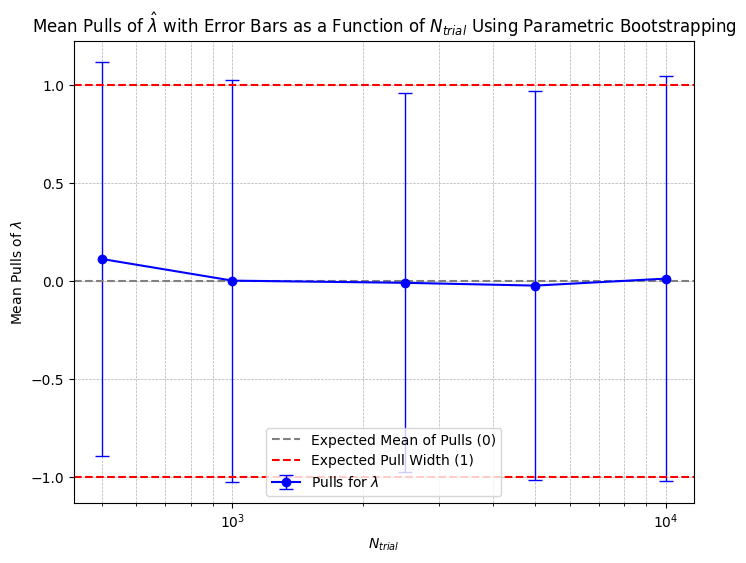

In [270]:
def plot_error_bar_for_pulls_of_lambda_part_e():
    N_trial_values = [500, 1000, 2500, 5000, 10000]  
    means = []
    errors = []

    # Compute means and errors for each N_trial
    for i, N_trial in enumerate(N_trial_values):
        pulls = pull_values_list_for_part_e[i]  # Pulls for lambda for this N_trial
        means.append(np.mean(pulls))           # Mean of the pulls
        errors.append(np.std(pulls))  # Standard error of the mean

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.errorbar(N_trial_values, means, yerr=errors, color='blue', fmt='o-', capsize=5, elinewidth=1, label="Pulls for $\lambda$")
    plt.axhline(0, color='gray', linestyle='--', label="Expected Mean of Pulls (0)")
    plt.axhline(1, color='red', linestyle='--', label="Expected Pull Width (1)")
    plt.axhline(-1, color='red', linestyle='--')
    plt.title("Mean Pulls of $\hat{\lambda}$ with Error Bars as a Function of $N_{trial}$ Using Parametric Bootstrapping")
    plt.xlabel("$N_{trial}$")
    plt.ylabel("Mean Pulls of $\lambda$")
    plt.xscale("log") 
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

plot_error_bar_for_pulls_of_lambda_part_e()

Plots for the estimated lambda values:

In [195]:
estimated_lambda_values_list_for_part_e = []
estimated_lambda_values_list_for_part_e.append(lambda_part_e_500)
estimated_lambda_values_list_for_part_e.append(lambda_part_e_1000)
estimated_lambda_values_list_for_part_e.append(lambda_part_e_2500)
estimated_lambda_values_list_for_part_e.append(lambda_part_e_5000)
estimated_lambda_values_list_for_part_e.append(lambda_part_e_10000)

<>:29: SyntaxWarning: invalid escape sequence '\h'
<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\l'
<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\h'
<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\l'
<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\h'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/4294884581.py:29: SyntaxWarning: invalid escape sequence '\h'
  N_trial_values, means, yerr=errors, fmt='o-', capsize=5, elinewidth=1, color='blue', label="Mean of $\hat{\lambda}$"
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/4294884581.py:31: SyntaxWarning: invalid escape sequence '\l'
  ax0.axhline(tru

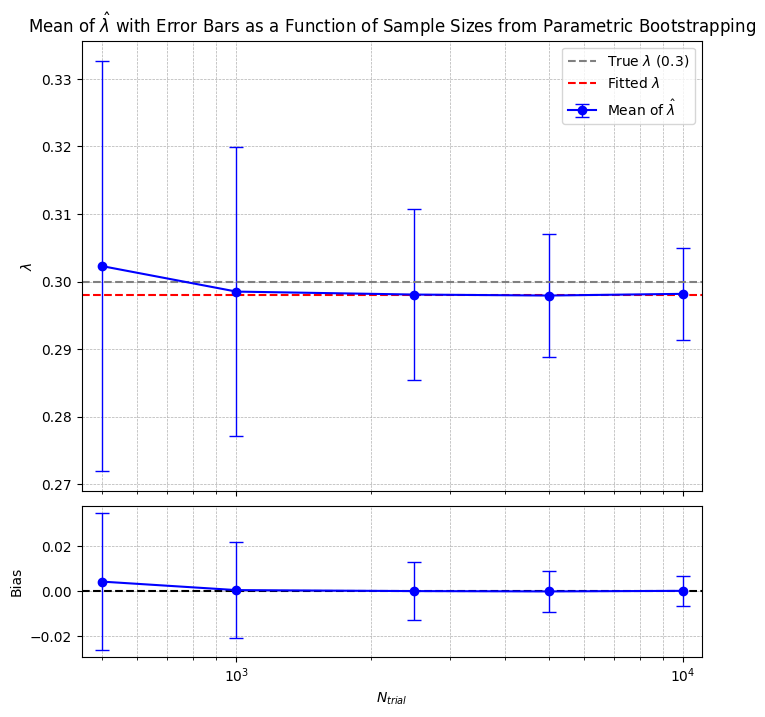

In [256]:
import matplotlib.gridspec as gridspec

def plot_error_bar_for_lambda_part_e():
    N_trial_values = [500, 1000, 2500, 5000, 10000]  
    means = []
    errors = []
    biases = []

    true_lambda = 0.3  # True lambda value
    fitted_lambda = mi.values[6]  # Fitted lambda value

    # Compute means, errors, and biases for each N_trial
    for i, N_trial in enumerate(N_trial_values):
        estimated_lambda = estimated_lambda_values_list_for_part_e[i]  
        mean_lambda = np.mean(estimated_lambda)
        std_lambda = np.std(estimated_lambda)

        means.append(mean_lambda)            # Mean estimated lambda
        errors.append(std_lambda)            # Standard deviation as error
        biases.append(mean_lambda - fitted_lambda)  # Bias = mean - fitted lambda

    # Create the figure with gridspec for custom subplot heights
    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)  

    # Top Plot: Mean of Lambda
    ax0 = plt.subplot(gs[0])
    ax0.errorbar(
        N_trial_values, means, yerr=errors, fmt='o-', capsize=5, elinewidth=1, color='blue', label="Mean of $\hat{\lambda}$"
    )
    ax0.axhline(true_lambda, color='gray', linestyle='--', label="True $\lambda$ (0.3)")
    ax0.axhline(fitted_lambda, color='red', linestyle='--', label="Fitted $\lambda$")
    ax0.set_title("Mean of $\hat{\lambda}$ with Error Bars as a Function of Sample Sizes from Parametric Bootstrapping")
    ax0.set_ylabel("$\lambda$")
    ax0.set_xscale("log")
    ax0.set_xlim(min(N_trial_values) * 0.9, max(N_trial_values) * 1.1)
    ax0.legend()
    ax0.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax0.tick_params(labelbottom=False)  # Hide x-ticks for the top plot

    # Bottom Plot: Bias of Lambda
    ax1 = plt.subplot(gs[1], sharex=ax0)
    ax1.errorbar(
        N_trial_values, biases, yerr=errors, fmt='o-', capsize=5, elinewidth=1, color='blue', label="Bias of $\hat{\lambda}$"
    )
    ax1.axhline(0, color='black', linestyle='--', label="Zero Bias Line")
    ax1.set_xlabel("$N_{trial}$")
    ax1.set_ylabel("Bias")
    ax1.set_xscale("log")
    ax1.set_xlim(min(N_trial_values) * 0.9, max(N_trial_values) * 1.1)
    ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

plot_error_bar_for_lambda_part_e()

<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:15: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:15: SyntaxWarning: invalid escape sequence '\h'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1968458325.py:14: SyntaxWarning: invalid escape sequence '\h'
  plt.errorbar(N_trial_values, std_on_lambda, yerr=errors_of_std, color='blue', fmt='o-', capsize=5, elinewidth=1, label="Standard deviation of $\hat{\lambda}$ (parametric boootstrapping)")
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1968458325.py:15: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Standard deviation of $\hat{\lambda}$ from parametric bootstrapping with Error Bars as a Function of $N_{trial}$")


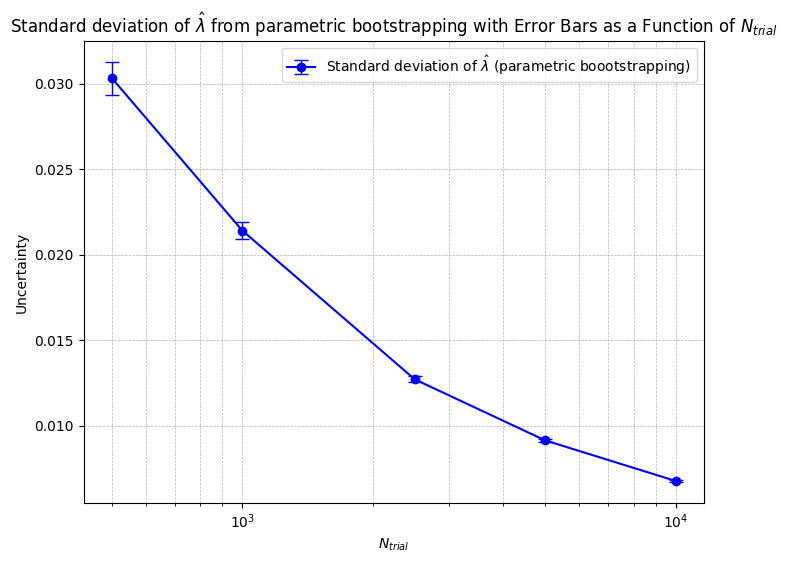

In [269]:
def plot_uncertainty_on_lambda_part_e():
    N_trial_values = [500, 1000, 2500, 5000, 10000]  
    std_on_lambda = []
    errors_of_std = []

    # Compute means and errors for each N_trial
    for i, N_trial in enumerate(N_trial_values):
        estimated_lambda = estimated_lambda_values_list_for_part_e[i]  # Pulls for lambda for this N_trial
        std_on_lambda.append(np.std(estimated_lambda))           # Mean of the pulls
        errors_of_std.append(np.std(estimated_lambda) / np.sqrt(2*(N_trial-1)))  # Standard error of the mean

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.errorbar(N_trial_values, std_on_lambda, yerr=errors_of_std, color='blue', fmt='o-', capsize=5, elinewidth=1, label="Standard deviation of $\hat{\lambda}$ (parametric boootstrapping)")
    plt.title("Standard deviation of $\hat{\lambda}$ from parametric bootstrapping with Error Bars as a Function of $N_{trial}$")
    plt.xlabel("$N_{trial}$")
    plt.ylabel("Uncertainty")
    plt.xscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

plot_uncertainty_on_lambda_part_e()

# (f) sWeights

## Extended Maximum Likelihood Fit on X

In [7]:
def extended_maximum_likelihood_fit_on_x(x_sample, N, f, mu, sigma, beta, m):

    nll = ExtendedUnbinnedNLL(x_sample, DistriFuncs.total_density_x)

    mi = Minuit(
        nll,
        N=N,
        f=f,
        mu=mu,
        sigma=sigma,
        beta=beta,
        m=m
    )

    mi.limits["mu"] = (0, 6) 
    mi.limits["sigma"] = (0, 1.5)
    mi.limits["beta"] = (0, 2)
    mi.limits["m"] = (1, 3)
    mi.limits["f"] = (0, 1)

    mi.migrad()
    mi.hesse()

    return mi

In [116]:
mi_x = extended_maximum_likelihood_fit_on_x(x_sample,
                                     N=num_events, 
                                     f=initial_f, 
                                     mu=initial_mu, 
                                     sigma=initial_sigma, 
                                     beta=initial_beta, 
                                     m=initial_m
                                     )
print(mi_x)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.835e+06                 │              Nfcn = 159              │
│ EDM = 0.00032 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

## Produce sWeights

In [117]:
from sweights import SWeight

sf = lambda x: DistriFuncs.g_s(x, mi_x.values['mu'], mi_x.values['sigma'], mi_x.values['beta'], mi_x.values['m'])
bf = lambda x: DistriFuncs.g_b(x)
sy = mi_x.values['N'] * mi_x.values['f']
by = mi_x.values['N'] * (1 - mi_x.values['f'])

sweighter = SWeight( x_sample, pdfs=[sf,bf], yields=[sy,by], discvarranges=((0,5),) )

    PDF normalisations:
	 0 0.9999999993477298
	 1 1.0
    Integral of w*pdf matrix (should be close to the
                identity):
	[[ 1.00002069e+00 -2.51467082e-05]
	 [-1.79857892e-05  1.00002619e+00]]
    Check of weight sums (should match yields):
	Component  | sWeightSum |   Yield    |   Diff    |
	---------------------------------------------------
	  0        | 60108.8894 | 60108.8894 |    -0.00% |
	  1        | 39891.3148 | 39891.3148 |     0.00% |


In [118]:
sw = sweighter.get_weight(0, x_sample)

ysw, ye = np.histogram( y_sample, bins=50, range=(0,10), weights=sw )

n2ll = cost.ExtendedBinnedNLL( ysw, ye, DistriFuncs.density_h_s_cdf)
mi_y = Minuit( n2ll, Ns=num_events * initial_f, lambda_param=initial_Lambda)
mi_y.migrad()
mi_y.hesse()
display(mi_y)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 94.7 (χ²/ndof = 2.0)       │              Nfcn = 34               │
│ EDM = 9.66e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Ns           │  60.11e3  │  0.24e3   │            │            │         │         │       │
│ 1 │ lambda_param │  0.2979   │  0.0017   │            │            │         │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬───────────────────────────┐
│              │           Ns lambda_param │
├──────────────┼───────────────────────────┤
│           Ns │     6.01e+04      -1.4e-6 │
│ lambda_param │      -1.4e-6     2.96e-06 │
└──────────────┴───────────────────────────┘

In [124]:
def sweights_toy(toy, N_trial):
    x_toy, y_toy = toy
    mi_x = extended_maximum_likelihood_fit_on_x(x_toy,
                                     N=N_trial, 
                                     f=initial_f, 
                                     mu=initial_mu, 
                                     sigma=initial_sigma, 
                                     beta=initial_beta, 
                                     m=initial_m
                                     )
    sf = lambda x: DistriFuncs.g_s(x, mi_x.values['mu'], mi_x.values['sigma'], mi_x.values['beta'], mi_x.values['m'])
    bf = lambda x: DistriFuncs.g_b(x)
    sy = mi_x.values['N'] * mi_x.values['f']
    by = mi_x.values['N'] * (1 - mi_x.values['f'])

    sweighter = SWeight( x_toy, pdfs=[sf,bf], yields=[sy,by], discvarranges=((0,5),), checks=False)

    sw = sweighter.get_weight(0, x_toy)

    ysw, ye = np.histogram( y_toy, bins=50, range=(0,10), weights=sw )

    n2ll = cost.ExtendedBinnedNLL( ysw, ye, DistriFuncs.density_h_s_cdf)
    mi_y = Minuit( n2ll, Ns=N_trial * initial_f, lambda_param=initial_Lambda)
    mi_y.migrad()
    mi_y.hesse()

    return mi_y

In [ ]:
def sweight_plot(N_trial):

    # Loading the file with mi.values
    loaded_fit_values = np.load("fitted_parameters.npy")
    fitted_f = loaded_fit_values[1]
    fitted_Lambda = loaded_fit_values[6]


    toys = generate_250_toys(N_trial)

    # Now fit each toy and store the values and errors
    values = []
    errors = []
    for toy in tqdm(toys):
        mi_t = sweights_toy(toy, N_trial)
        values.append(list(mi_t.values))
        errors.append(list(mi_t.errors))
    
    values = np.array(values)
    truth = np.array([N_trial * fitted_f, fitted_Lambda])
    errors = np.array(errors)
    pulls = (values - truth)/errors

    # Plot them
    fig, axes = plt.subplots(2,2, figsize=(14, 10))
    names = ['N', r'\lambda']
    for i, name in enumerate(names):

        estname = f"\hat{{{name.split('_')[0]}}}"
        if len(name.split('_'))>1: estname += '_'+name.split('_')[1]

        ax = axes[i,0]
        plot( values[:,i], ax ) 
        ax.set_xlabel( f"${estname}$" )
        ax.set_title(f"Distribution of ${estname}$")

        ax = axes[i,1]
        plot( pulls[:,i], ax ) 
        ax.set_xlabel( f"$p({estname})$" )
        ax.set_title(f"Distribution pulls of ${estname}$")

    plt.show()

    return values[:,1], pulls[:,1]

<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:33: SyntaxWarning: invalid escape sequence '\h'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/3281258028.py:33: SyntaxWarning: invalid escape sequence '\h'
  estname = f"\hat{{{name.split('_')[0]}}}"


100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


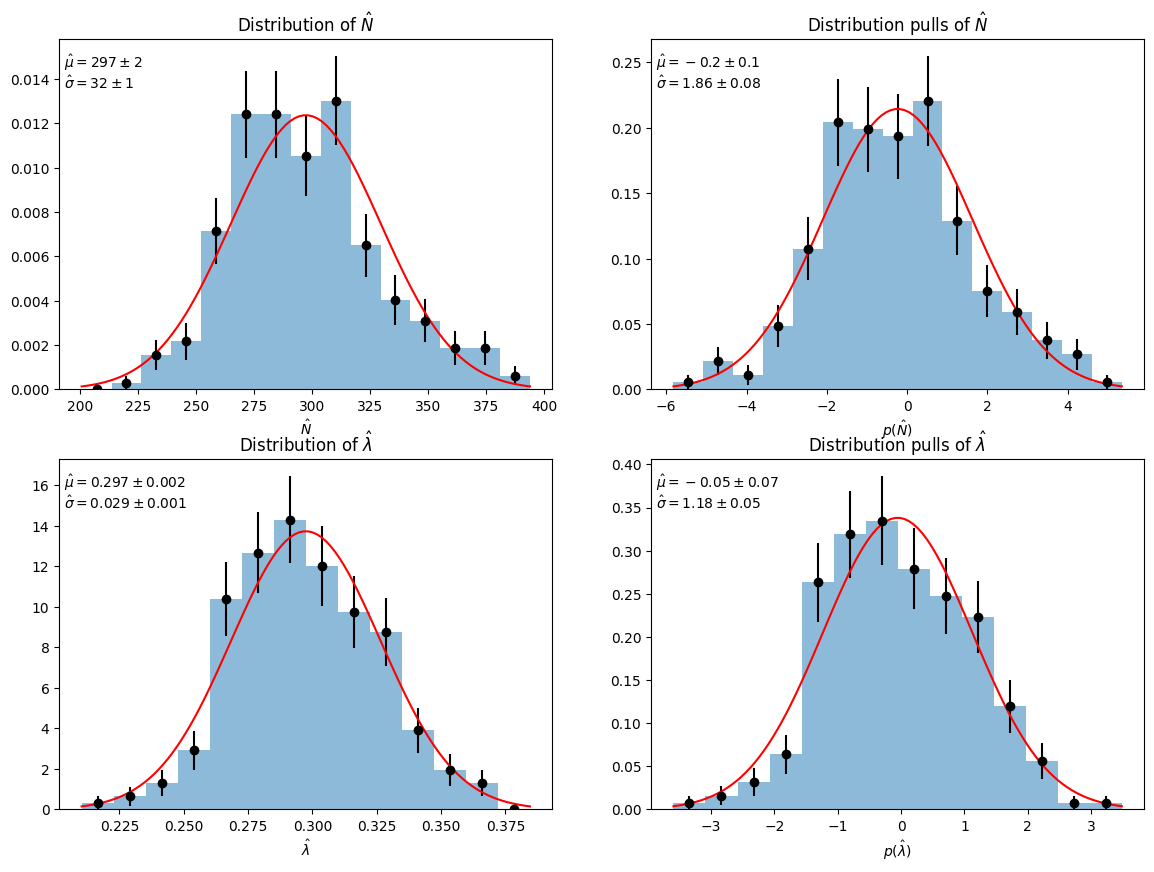

[0.29911059 0.28299758 0.26930154 0.2869748  0.3341324  0.27891029
 0.2836614  0.2908919  0.28499058 0.29311278 0.29966079 0.2749779
 0.2788718  0.32751127 0.3133888  0.26567733 0.33180767 0.26526029
 0.35098413 0.31277919 0.31006691 0.23384812 0.30730697 0.35411688
 0.31547056 0.35447056 0.28305458 0.3290699  0.29382248 0.3053301
 0.28501575 0.26679279 0.30972383 0.2863135  0.28083276 0.32726156
 0.3855087  0.30203928 0.31217879 0.27242403 0.29403214 0.28060819
 0.28551026 0.27803042 0.31788423 0.26607524 0.33751976 0.26101806
 0.32784311 0.31732463 0.29174798 0.26387843 0.28004797 0.26450947
 0.32830815 0.27461124 0.31339386 0.31607084 0.31677419 0.3402974
 0.28915347 0.29253519 0.31965976 0.30186014 0.25914852 0.2449809
 0.30568198 0.3255764  0.27700707 0.27711008 0.33224181 0.27126491
 0.28579516 0.26349113 0.33244608 0.29645584 0.29181974 0.34339415
 0.29291975 0.29009626 0.29731312 0.25976729 0.29655127 0.30862728
 0.32425909 0.31411291 0.32159617 0.31067223 0.28013627 0.30357876

In [ ]:
lambda_part_f_500, pulls_part_f_500 = sweight_plot(N_trial=500)

100%|██████████| 250/250 [02:18<00:00,  1.81it/s]


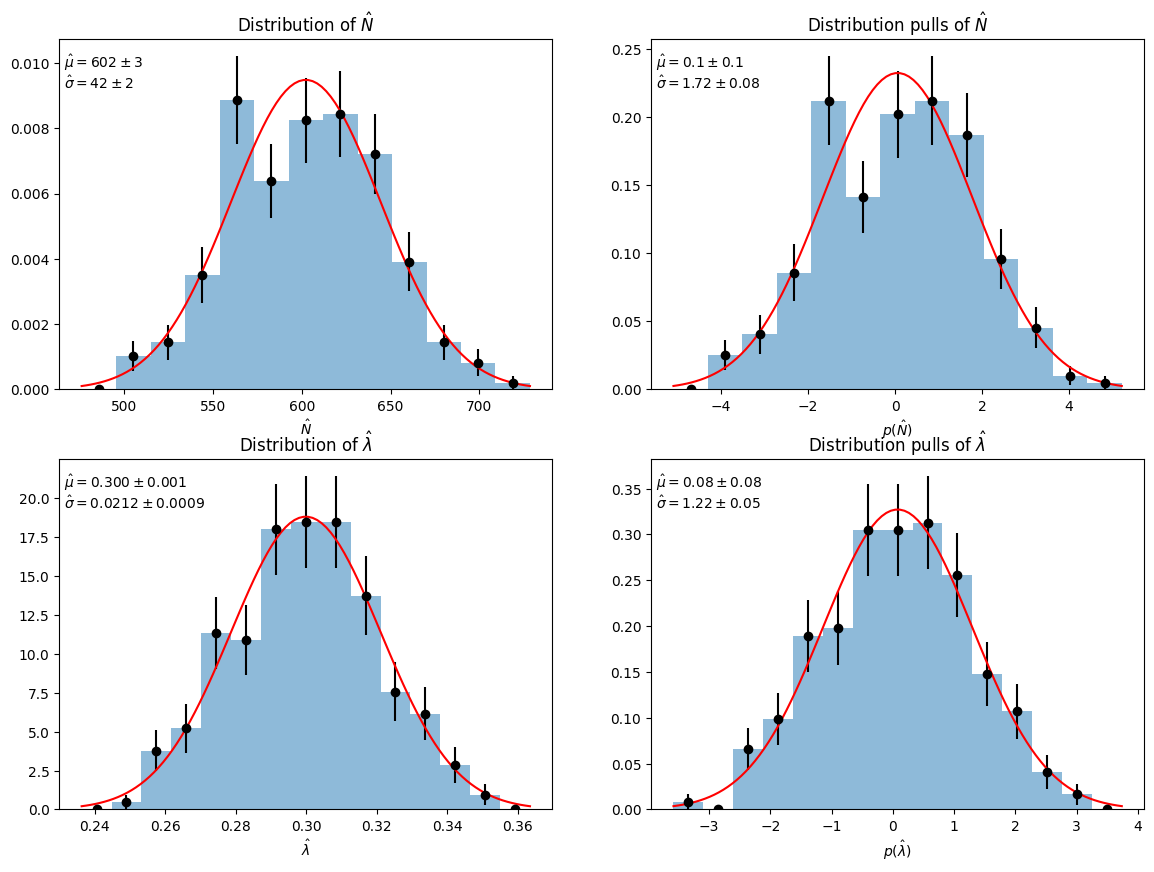

In [211]:
lambda_part_f_1000, pulls_part_f_1000 = sweight_plot(N_trial=1000)

100%|██████████| 250/250 [02:13<00:00,  1.87it/s]


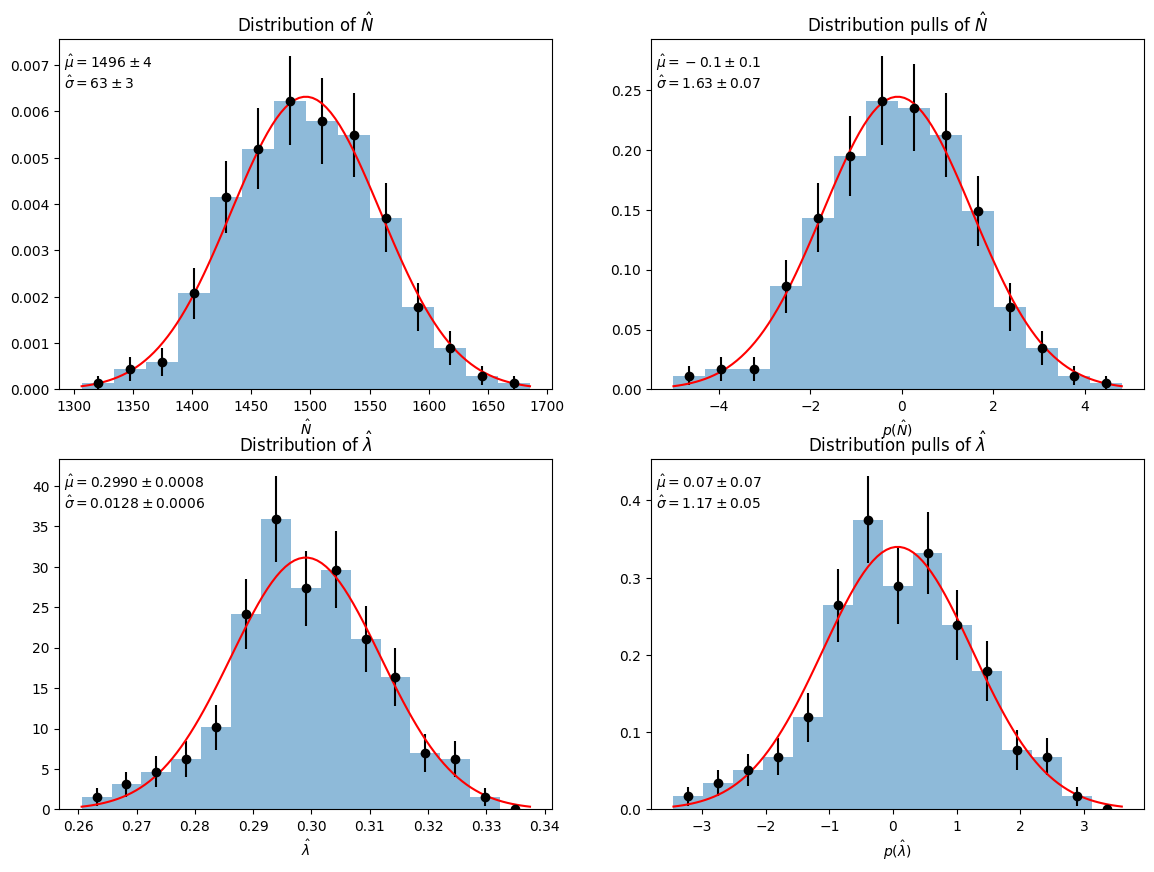

In [212]:
lambda_part_f_2500, pulls_part_f_2500 = sweight_plot(N_trial=2500)

100%|██████████| 250/250 [02:29<00:00,  1.67it/s]


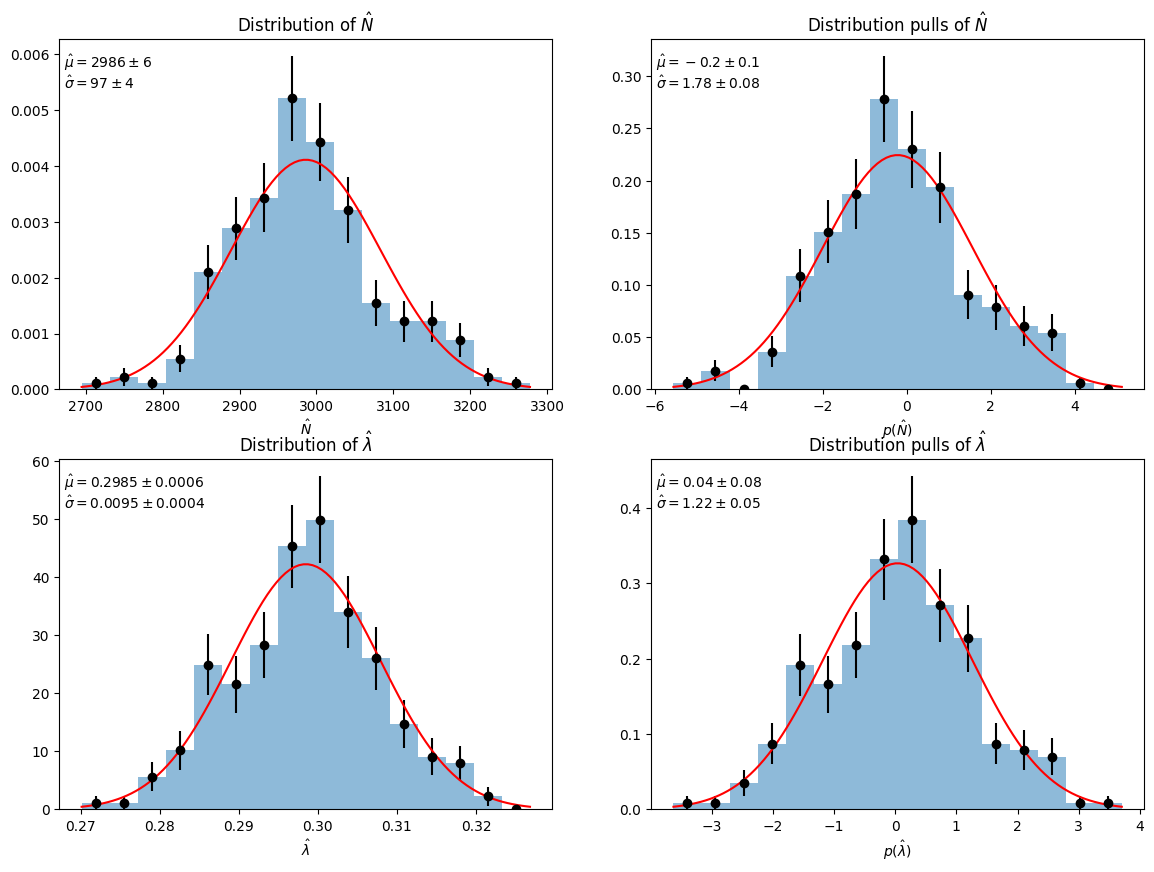

In [215]:
lambda_part_f_5000, pulls_part_f_5000 = sweight_plot(N_trial=5000)

100%|██████████| 250/250 [03:15<00:00,  1.28it/s]


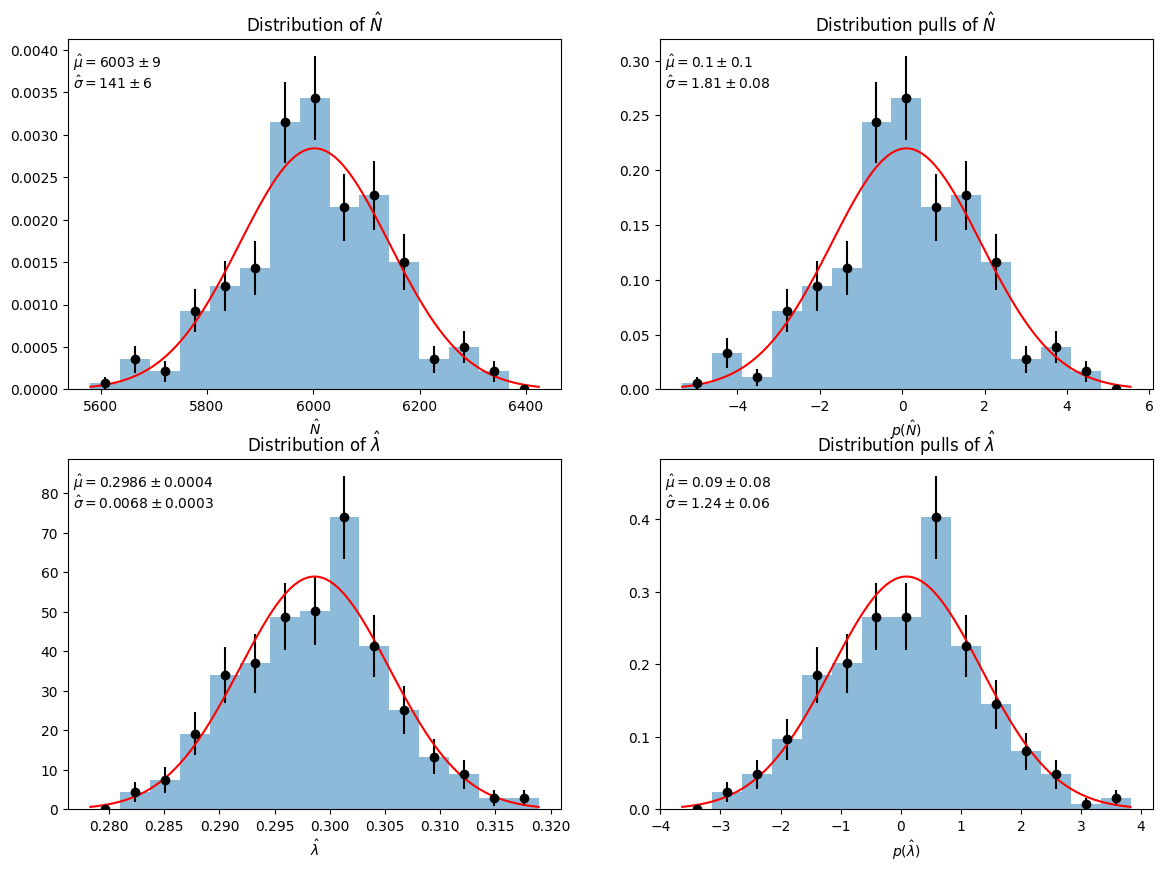

In [216]:
lambda_part_f_10000, pulls_part_f_10000 = sweight_plot(N_trial=10000)

## Analysis of decay constant

Analysing the pull:

In [217]:
pull_values_list_for_part_f = []
pull_values_list_for_part_f.append(pulls_part_f_500)
pull_values_list_for_part_f.append(pulls_part_f_1000)
pull_values_list_for_part_f.append(pulls_part_f_2500)
pull_values_list_for_part_f.append(pulls_part_f_5000)
pull_values_list_for_part_f.append(pulls_part_f_10000)

<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\l'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1373594297.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.errorbar(N_trial_values, means, yerr=errors, color='blue', fmt='o-', capsize=5, elinewidth=1, label="Pulls for $\lambda$")
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1373594297.py:18: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Mean Pulls of $\hat{\lambda}$ with Error Bars as a Function of $N_{trial}$ with sWeights")
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1373594297.py:20: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("Mean Pulls of $\lambda$")


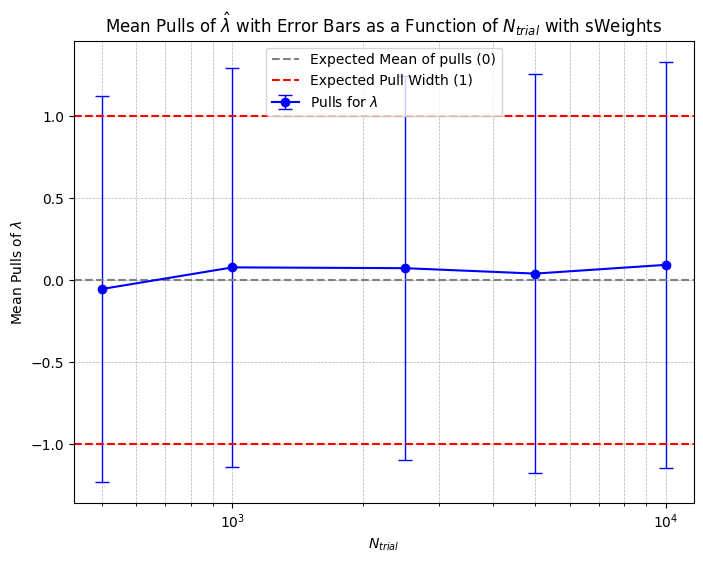

In [268]:
def plot_error_bar_for_pulls_of_lambda_part_f():
    N_trial_values = [500, 1000, 2500, 5000, 10000]  
    means = []
    errors = []

    # Compute means and errors for each N_trial
    for i, N_trial in enumerate(N_trial_values):
        pulls = pull_values_list_for_part_f[i]  # Pulls for lambda for this N_trial
        means.append(np.mean(pulls))           # Mean of the pulls
        errors.append(np.std(pulls))  # Standard error of the mean

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.errorbar(N_trial_values, means, yerr=errors, color='blue', fmt='o-', capsize=5, elinewidth=1, label="Pulls for $\lambda$")
    plt.axhline(0, color='gray', linestyle='--', label="Expected Mean of pulls (0)")
    plt.axhline(1, color='red', linestyle='--', label="Expected Pull Width (1)")
    plt.axhline(-1, color='red', linestyle='--')
    plt.title("Mean Pulls of $\hat{\lambda}$ with Error Bars as a Function of $N_{trial}$ with sWeights")
    plt.xlabel("$N_{trial}$")
    plt.ylabel("Mean Pulls of $\lambda$")
    plt.xscale("log")  
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

plot_error_bar_for_pulls_of_lambda_part_f()

Analysing the estimated lambda values:

In [219]:
estimated_lambda_values_list_for_part_f = []
estimated_lambda_values_list_for_part_f.append(lambda_part_f_500)
estimated_lambda_values_list_for_part_f.append(lambda_part_f_1000)
estimated_lambda_values_list_for_part_f.append(lambda_part_f_2500)
estimated_lambda_values_list_for_part_f.append(lambda_part_f_5000)
estimated_lambda_values_list_for_part_f.append(lambda_part_f_10000)

<>:27: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\h'
<>:32: SyntaxWarning: invalid escape sequence '\l'
<>:42: SyntaxWarning: invalid escape sequence '\h'
<>:27: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\h'
<>:32: SyntaxWarning: invalid escape sequence '\l'
<>:42: SyntaxWarning: invalid escape sequence '\h'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1447312070.py:27: SyntaxWarning: invalid escape sequence '\h'
  N_trial_values, means, yerr=errors, fmt='o-', capsize=5, elinewidth=1, color='blue', label="Mean of $\hat{\lambda}$"
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1447312070.py:29: SyntaxWarning: invalid escape sequence '\l'
  ax0.axhline(tru

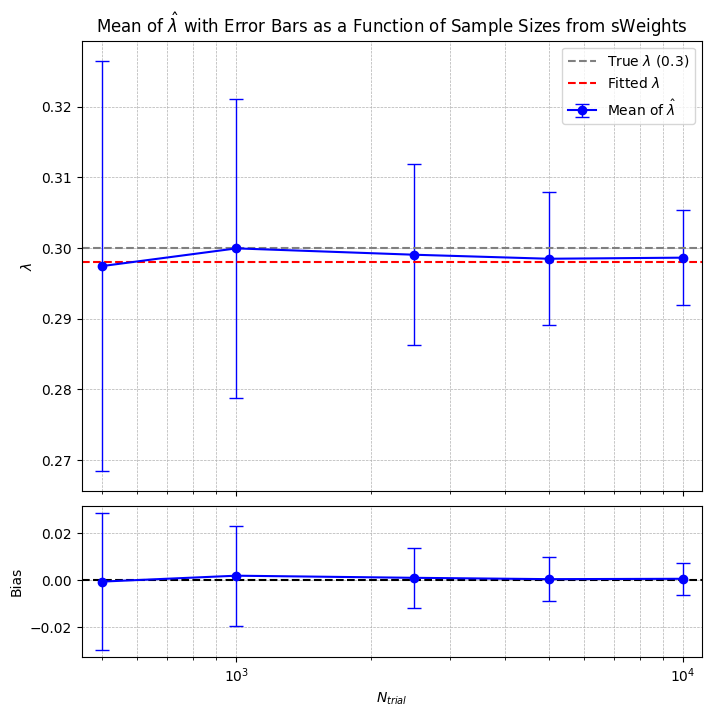

In [259]:
def plot_error_bar_for_lambda_part_f():
    N_trial_values = [500, 1000, 2500, 5000, 10000]  
    means = []
    errors = []
    biases = []

    true_lambda = 0.3  # True lambda value
    fitted_lambda = mi.values[6]  # Fitted lambda value

    # Compute means, errors, and biases for each N_trial
    for i, N_trial in enumerate(N_trial_values):
        estimated_lambda = estimated_lambda_values_list_for_part_f[i]  
        mean_lambda = np.mean(estimated_lambda)
        std_lambda = np.std(estimated_lambda)

        means.append(mean_lambda)            # Mean estimated lambda
        errors.append(std_lambda)            # Standard deviation as error
        biases.append(mean_lambda - fitted_lambda)  # Bias = mean - fitted lambda

    # Create the figure with gridspec for custom subplot heights
    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)  

    # Top Plot: Mean of Lambda
    ax0 = plt.subplot(gs[0])
    ax0.errorbar(
        N_trial_values, means, yerr=errors, fmt='o-', capsize=5, elinewidth=1, color='blue', label="Mean of $\hat{\lambda}$"
    )
    ax0.axhline(true_lambda, color='gray', linestyle='--', label="True $\lambda$ (0.3)")
    ax0.axhline(fitted_lambda, color='red', linestyle='--', label="Fitted $\lambda$")
    ax0.set_title("Mean of $\hat{\lambda}$ with Error Bars as a Function of Sample Sizes from sWeights")
    ax0.set_ylabel("$\lambda$")
    ax0.set_xscale("log")
    ax0.set_xlim(min(N_trial_values) * 0.9, max(N_trial_values) * 1.1)
    ax0.legend()
    ax0.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax0.tick_params(labelbottom=False)  # Hide x-ticks for the top plot

    # Bottom Plot: Bias of Lambda
    ax1 = plt.subplot(gs[1], sharex=ax0)
    ax1.errorbar(
        N_trial_values, biases, yerr=errors, fmt='o-', capsize=5, elinewidth=1, color='blue', label="Bias of $\hat{\lambda}$"
    )
    ax1.axhline(0, color='black', linestyle='--', label="Zero Bias Line")
    ax1.set_xlabel("$N_{trial}$")
    ax1.set_ylabel("Bias")
    ax1.set_xscale("log")
    ax1.set_xlim(min(N_trial_values) * 0.9, max(N_trial_values) * 1.1)
    ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

plot_error_bar_for_lambda_part_f()

Plot the expected uncertainty:

Middle point: Standard deviation of lambda

error bar: error on standard deviation = Standard deviation of lambda / $\sqrt{2(N-1)}$

<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:15: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:15: SyntaxWarning: invalid escape sequence '\h'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/242955546.py:14: SyntaxWarning: invalid escape sequence '\h'
  plt.errorbar(N_trial_values, std_on_lambda, yerr=errors_of_std, fmt='o-', capsize=5, color='blue', elinewidth=1, label="Standard deviation of $\hat{\lambda}$ (sWeights)")
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/242955546.py:15: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Standard deviation of $\hat{\lambda}$ from sWeights with Error Bars as a Function of $N_{trial}$")


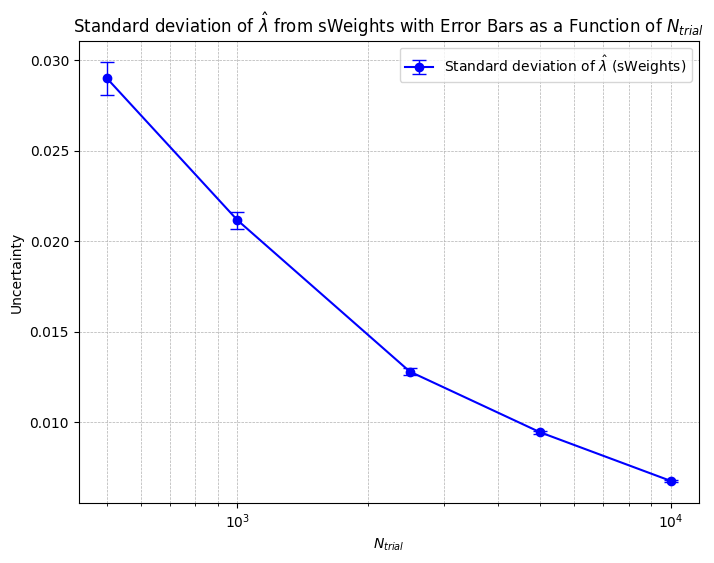

[np.float64(0.028990415158071242), np.float64(0.021158770962183958), np.float64(0.012794308723806193), np.float64(0.009438320730835142), np.float64(0.00675711103426331)]


In [ ]:
def plot_uncertainty_on_lambda_part_f():
    N_trial_values = [500, 1000, 2500, 5000, 10000]  
    std_on_lambda = []
    errors_of_std = []

    # Compute means and errors for each N_trial
    for i, N_trial in enumerate(N_trial_values):
        estimated_lambda = estimated_lambda_values_list_for_part_f[i]  # Pulls for lambda for this N_trial
        std_on_lambda.append(np.std(estimated_lambda))           # Mean of the pulls
        errors_of_std.append(np.std(estimated_lambda) / np.sqrt(2*(N_trial-1)))  # Standard error of the mean

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.errorbar(N_trial_values, std_on_lambda, yerr=errors_of_std, fmt='o-', capsize=5, color='blue', elinewidth=1, label="Standard deviation of $\hat{\lambda}$ (sWeights)")
    plt.title("Standard deviation of $\hat{\lambda}$ from sWeights with Error Bars as a Function of $N_{trial}$")
    plt.xlabel("$N_{trial}$")
    plt.ylabel("Uncertainty")
    plt.xscale("log")  
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()
    
    print(std_on_lambda)

plot_uncertainty_on_lambda_part_f()

# (g) Comparison between two methods

<>:38: SyntaxWarning: invalid escape sequence '\h'
<>:41: SyntaxWarning: invalid escape sequence '\h'
<>:43: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:45: SyntaxWarning: invalid escape sequence '\h'
<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:56: SyntaxWarning: invalid escape sequence '\h'
<>:59: SyntaxWarning: invalid escape sequence '\h'
<>:38: SyntaxWarning: invalid escape sequence '\h'
<>:41: SyntaxWarning: invalid escape sequence '\h'
<>:43: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:45: SyntaxWarning: invalid escape sequence '\h'
<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:56: SyntaxWarning: invalid escape sequence '\h'
<>:59: SyntaxWarning: invalid escape sequence '\h'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/265185447.py:38: SyntaxWarning: invalid escape sequence '\h'
  N_trial_values, means_e, yerr=errors_e, fmt='o-', capsize

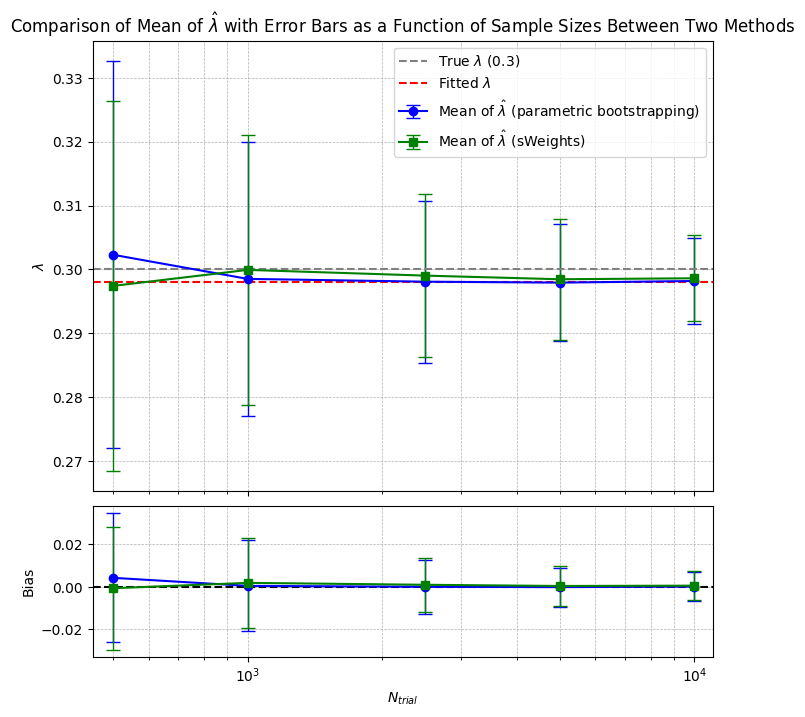

In [264]:
def comparing_lambda_and_bias():
    N_trial_values = [500, 1000, 2500, 5000, 10000]  
    means_e = []
    errors_e = []
    biases_e = []
    means_f = []
    errors_f = []
    biases_f = []

    true_lambda = 0.3  # True lambda value
    fitted_lambda = mi.values[6]  # Fitted lambda value

    # Compute means, errors, and biases for each N_trial
    for i, N_trial in enumerate(N_trial_values):
        estimated_lambda_e = estimated_lambda_values_list_for_part_e[i]  
        mean_lambda_e = np.mean(estimated_lambda_e)
        std_lambda_e = np.std(estimated_lambda_e)

        means_e.append(mean_lambda_e)            # Mean estimated lambda
        errors_e.append(std_lambda_e)            # Standard deviation as error
        biases_e.append(mean_lambda_e - fitted_lambda)  # Bias = mean - fitted lambda

        estimated_lambda_f = estimated_lambda_values_list_for_part_f[i]  
        mean_lambda_f = np.mean(estimated_lambda_f)
        std_lambda_f = np.std(estimated_lambda_f)

        means_f.append(mean_lambda_f)            
        errors_f.append(std_lambda_f)    
        biases_f.append(mean_lambda_f - fitted_lambda)

    # Create the figure with gridspec for custom subplot heights
    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)  

    # Top Plot: Mean of Lambda
    ax0 = plt.subplot(gs[0])
    ax0.errorbar(
        N_trial_values, means_e, yerr=errors_e, fmt='o-', capsize=5, elinewidth=1, color='blue', label="Mean of $\hat{\lambda}$ (parametric bootstrapping)"
    )
    ax0.errorbar(
        N_trial_values, means_f, yerr=errors_f, fmt='s-', capsize=5, elinewidth=1, color='green', label="Mean of $\hat{\lambda}$ (sWeights)"
    )
    ax0.axhline(true_lambda, color='gray', linestyle='--', label="True $\lambda$ (0.3)")
    ax0.axhline(fitted_lambda, color='red', linestyle='--', label="Fitted $\lambda$")
    ax0.set_title("Comparison of Mean of $\hat{\lambda}$ with Error Bars as a Function of Sample Sizes Between Two Methods")
    ax0.set_ylabel("$\lambda$")
    ax0.set_xscale("log")
    ax0.set_xlim(min(N_trial_values) * 0.9, max(N_trial_values) * 1.1)
    ax0.legend()
    ax0.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax0.tick_params(labelbottom=False)  # Hide x-ticks for the top plot

    # Bottom Plot: Bias of Lambda
    ax1 = plt.subplot(gs[1], sharex=ax0)
    ax1.errorbar(
        N_trial_values, biases_e, yerr=errors_e, fmt='o-', capsize=5, elinewidth=1, color='blue', label="Bias of $\hat{\lambda}$"
    )
    ax1.errorbar(
        N_trial_values, biases_f, yerr=errors_f, fmt='s-', capsize=5, elinewidth=1, color='green', label="Bias of $\hat{\lambda}$"
    )
    ax1.axhline(0, color='black', linestyle='--', label="Zero Bias Line")
    ax1.set_xlabel("$N_{trial}$")
    ax1.set_ylabel("Bias")
    ax1.set_xscale("log")
    ax1.set_xlim(min(N_trial_values) * 0.9, max(N_trial_values) * 1.1)
    ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

comparing_lambda_and_bias()

<>:24: SyntaxWarning: invalid escape sequence '\h'
<>:31: SyntaxWarning: invalid escape sequence '\h'
<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:24: SyntaxWarning: invalid escape sequence '\h'
<>:31: SyntaxWarning: invalid escape sequence '\h'
<>:33: SyntaxWarning: invalid escape sequence '\h'
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1231040376.py:24: SyntaxWarning: invalid escape sequence '\h'
  label="Standard deviation of $\hat{\lambda}$ (parametric bootstrapping)"
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1231040376.py:31: SyntaxWarning: invalid escape sequence '\h'
  label="Standard deviation of $\hat{\lambda}$ (sWeights)"
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/1231040376.py:33: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Comparison of standard deviation of $\hat{\lambda}$ as a Function of $N_{trial}$ between two methods")
/var/folders/zx/j5d_p2_s2wz05zg3b78717100000gn/T/ipykernel_2030/12

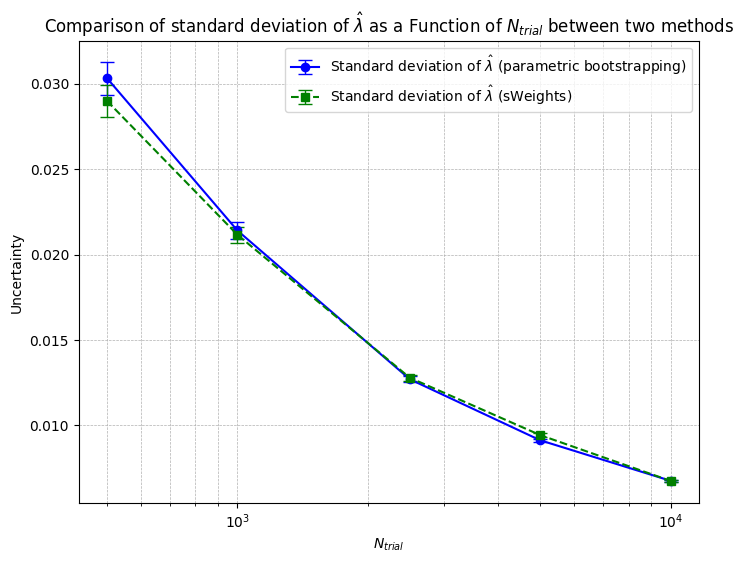

In [265]:
def comparing_uncertainty():
    N_trial_values = [500, 1000, 2500, 5000, 10000]  
    std_on_lambda_e = []
    errors_of_std_e = []
    std_on_lambda_f = []
    errors_of_std_f = []

    # Compute means and errors for each N_trial
    for i, N_trial in enumerate(N_trial_values):
        estimated_lambda_e = estimated_lambda_values_list_for_part_e[i]  
        std_on_lambda_e.append(np.std(estimated_lambda_e))           
        errors_of_std_e.append(np.std(estimated_lambda_e) / np.sqrt(2*(N_trial-1)))  
        
        estimated_lambda_f = estimated_lambda_values_list_for_part_f[i] 
        std_on_lambda_f.append(np.std(estimated_lambda_f))           
        errors_of_std_f.append(np.std(estimated_lambda_f) / np.sqrt(2*(N_trial-1)))  

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.errorbar(
        N_trial_values, std_on_lambda_e, 
        yerr=errors_of_std_e, 
        fmt='o-', color='blue', linestyle='-', capsize=5, elinewidth=1, 
        label="Standard deviation of $\hat{\lambda}$ (parametric bootstrapping)"
    )

    plt.errorbar(
        N_trial_values, std_on_lambda_f, 
        yerr=errors_of_std_f, 
        fmt='s-', color='green', linestyle='--', capsize=5, elinewidth=1, 
        label="Standard deviation of $\hat{\lambda}$ (sWeights)"
    )    
    plt.title("Comparison of standard deviation of $\hat{\lambda}$ as a Function of $N_{trial}$ between two methods")
    plt.xlabel("$N_{trial}$")
    plt.ylabel("Uncertainty")
    plt.xscale("log") 
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

comparing_uncertainty()